# 1.Contents : 
- 견종모두포함  

# 2. 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import re
import soynlp
sns.set_style('whitegrid', {'grid.linestyle':'--'})
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import datetime as dt
import warnings 
warnings.filterwarnings('ignore') 

C:\Users\LG\AppData\Local\Temp/ipykernel_6260/3573051386.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

In [3]:
pd.options.display.max_columns=None

# 3. 데이터불러오기

In [4]:
path = glob.glob('data/*.*')
for i in range(len(path)):
    print(i, path[i])

0 data\animal_raw.csv
1 data\관광지.csv
2 data\반려견정보.csv


In [5]:
path[2] # Raw Data Cleansing - 견종데이터(220708).csv

'data\\반려견정보.csv'

In [6]:
raw = pd.read_csv(path[2])#, index_col = 0)#, encoding = 'cp949')
df = raw.copy()
df.shape

(7826, 10)

# 4. 데이터 확인

In [7]:
df.head()

,품종,크기(체중에따른),크기(라벨링),나이,산책시간(시간),체중,적정음수량,성별,중성화여부,색상
0,골든 리트리버,대,2,13,0.5,27.0,1755.0,M,N,갈색
1,골든 리트리버,대,2,10,0.5,25.0,1625.0,F,N,갈색
2,골든 리트리버,대,2,9,0.5,40.0,2600.0,M,N,갈색
3,골든 리트리버,대,2,8,0.5,28.0,1820.0,F,N,갈색
4,골든 리트리버,대,2,8,0.5,33.0,2145.0,M,N,갈색


In [8]:
df.tail()

,품종,크기(체중에따른),크기(라벨링),나이,산책시간(시간),체중,적정음수량,성별,중성화여부,색상
7821,핏불테리어,대,2,2,1.5,25.0,1625.0,F,U,검은색
7822,화이트테리어,소,0,13,0.5,7.3,474.5,F,Y,흰
7823,화이트테리어,소,0,5,1.5,5.0,325.0,F,U,흰색
7824,휘펫,중,1,2,1.0,14.0,910.0,M,N,베이지
7825,휘펫,중,1,2,1.0,19.5,1267.5,F,U,검/갈/흰


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7826 entries, 0 to 7825
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   품종         7826 non-null   object 
 1   크기(체중에따른)  7826 non-null   object 
 2   크기(라벨링)    7826 non-null   int64  
 3   나이         7826 non-null   int64  
 4   산책시간(시간)   7826 non-null   float64
 5   체중         7826 non-null   float64
 6   적정음수량      7826 non-null   float64
 7   성별         7826 non-null   object 
 8   중성화여부      7826 non-null   object 
 9   색상         7826 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 611.5+ KB


In [10]:
df.isnull().sum()

품종           0
크기(체중에따른)    0
크기(라벨링)      0
나이           0
산책시간(시간)     0
체중           0
적정음수량        0
성별           0
중성화여부        0
색상           0
dtype: int64

In [11]:
df['품종'].nunique()

83

In [12]:
df['품종'].unique()

array(['골든 리트리버', '그레이 하운드', '그레이트 덴', '그레이트피레니즈', '네오폴리탄 마스티프', '닥스훈트',
       '달마시안', '도베르만', '도사', '동경견', '라브라도리트리버', '라사 압소', '라이카', '로트와일러',
       '마리노이즈', '말라뮤트', '말티즈', '미니어쳐 푸들', '미니어쳐슈나우저', '미니어쳐핀셔', '믹스견',
       '바센지', '바셋 하운드', '버니즈 마운틴 독', '베들링턴 테리어', '보더콜리', '보르조이', '보스턴테리어',
       '불 테리어', '불독', '브리타니 스파니엘', '비글', '비숑 프리제', '빠삐용', '사모예드', '삽살',
       '샤페이', '세인트 버나드', '셔틀랜드 쉽독', '셰퍼드', '슈나우져', '스코티쉬 테리어', '스탠다드 푸들',
       '스피츠', '시바견', '시베리안허스키', '시츄', '아메리칸 아키다', '아메리칸 코카 스파니엘',
       '아메리칸 핏불 테리어', '아메리칸불리', '아프간 하운드', '알라스칸 말라뮤트', '올드 잉글리쉬 쉽독',
       '요크셔 테리어', '울프독', '웰시코기', '이탈리안 그레이 하운드', '잉글리쉬 세터', '잭 러셀 테리어',
       '제페니즈칭', '진도견', '차우차우', '치와와', '카네코르소', '캐벌리어 킹 찰스 스파니엘', '케인 코르소',
       '코리아 트라이 하운드', '코카스파니엘', '콜리', '토이 푸들', '티베탄 마스티프', '퍼그', '페키니즈',
       '포메라니안', '포인터', '폼피츠', '푸들', '풍산견', '프렌치불독', '핏불테리어', '화이트테리어',
       '휘펫'], dtype=object)

In [13]:
df['품종'].value_counts()

믹스견            5738
말티즈             348
푸들              302
포메라니안           167
진도견             148
               ... 
아메리칸 핏불 테리어       1
아프간 하운드           1
제페니즈칭             1
잭 러셀 테리어          1
스코티쉬 테리어          1
Name: 품종, Length: 83, dtype: int64

In [14]:
df['크기(체중에따른)'].value_counts()

소    5503
중    1715
대     608
Name: 크기(체중에따른), dtype: int64

In [15]:
df['크기(라벨링)'].value_counts()

0    5503
1    1715
2     608
Name: 크기(라벨링), dtype: int64

# 5. 데이터 정리(cleansing)

In [16]:
df.head()

,품종,크기(체중에따른),크기(라벨링),나이,산책시간(시간),체중,적정음수량,성별,중성화여부,색상
0,골든 리트리버,대,2,13,0.5,27.0,1755.0,M,N,갈색
1,골든 리트리버,대,2,10,0.5,25.0,1625.0,F,N,갈색
2,골든 리트리버,대,2,9,0.5,40.0,2600.0,M,N,갈색
3,골든 리트리버,대,2,8,0.5,28.0,1820.0,F,N,갈색
4,골든 리트리버,대,2,8,0.5,33.0,2145.0,M,N,갈색


In [17]:
df.columns

Index(['품종', '크기(체중에따른)', '크기(라벨링)', '나이', '산책시간(시간)', '체중', '적정음수량', '성별',
       '중성화여부', '색상'],
      dtype='object')

- 데이터 정리  
['품종', '크기(체중에따른)', '크기(라벨링)', '나이', '산책시간(시간)', '체중', '적정음수량']

In [18]:
# 성별, 중성화여부는 제외하자 - 결측치를 다루기엔 데이터가 많음 - 그리고 범주형이라 어짜피 빼야함 
df1 = df[['품종','크기(라벨링)', '나이', '산책시간(시간)', '체중', '적정음수량']]


In [19]:
df1.head()

,품종,크기(라벨링),나이,산책시간(시간),체중,적정음수량
0,골든 리트리버,2,13,0.5,27.0,1755.0
1,골든 리트리버,2,10,0.5,25.0,1625.0
2,골든 리트리버,2,9,0.5,40.0,2600.0
3,골든 리트리버,2,8,0.5,28.0,1820.0
4,골든 리트리버,2,8,0.5,33.0,2145.0


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7826 entries, 0 to 7825
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   품종        7826 non-null   object 
 1   크기(라벨링)   7826 non-null   int64  
 2   나이        7826 non-null   int64  
 3   산책시간(시간)  7826 non-null   float64
 4   체중        7826 non-null   float64
 5   적정음수량     7826 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 367.0+ KB


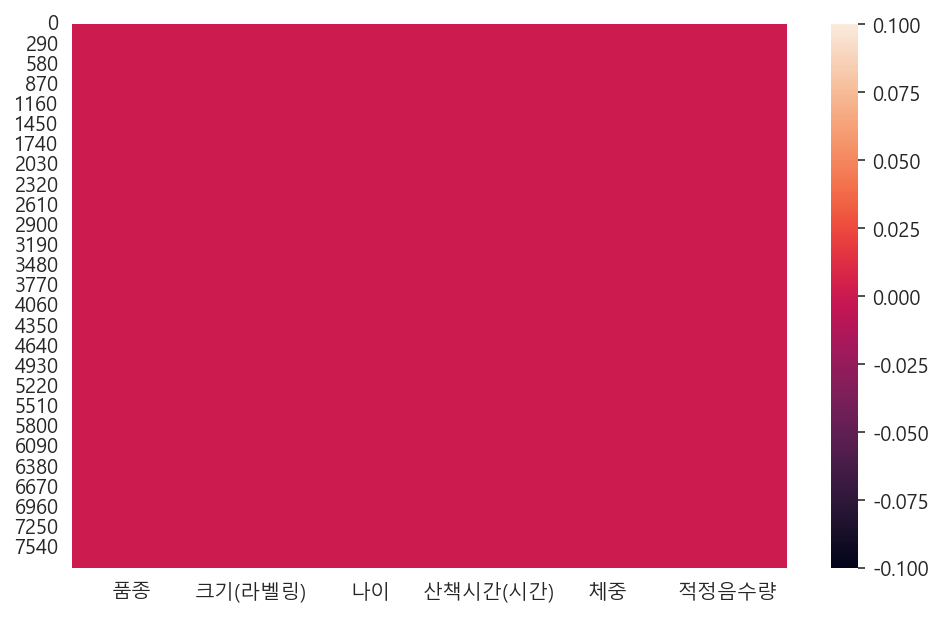

In [21]:
plt.figure(figsize = (8, 5))
sns.heatmap(df1.isnull())
plt.show()

In [22]:
df1.describe()

,크기(라벨링),나이,산책시간(시간),체중,적정음수량
count,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000
mean,0.374521,2.099540,0.897304,7.794053,506.613455
std,0.624247,2.647694,0.168873,6.967980,452.918710
min,0.000000,0.000000,0.500000,0.040000,2.600000
25%,0.000000,0.000000,0.800000,3.000000,195.000000
50%,0.000000,1.000000,1.000000,5.000000,325.000000
75%,1.000000,3.000000,1.000000,11.000000,715.000000
max,2.000000,18.000000,1.500000,60.000000,3900.000000


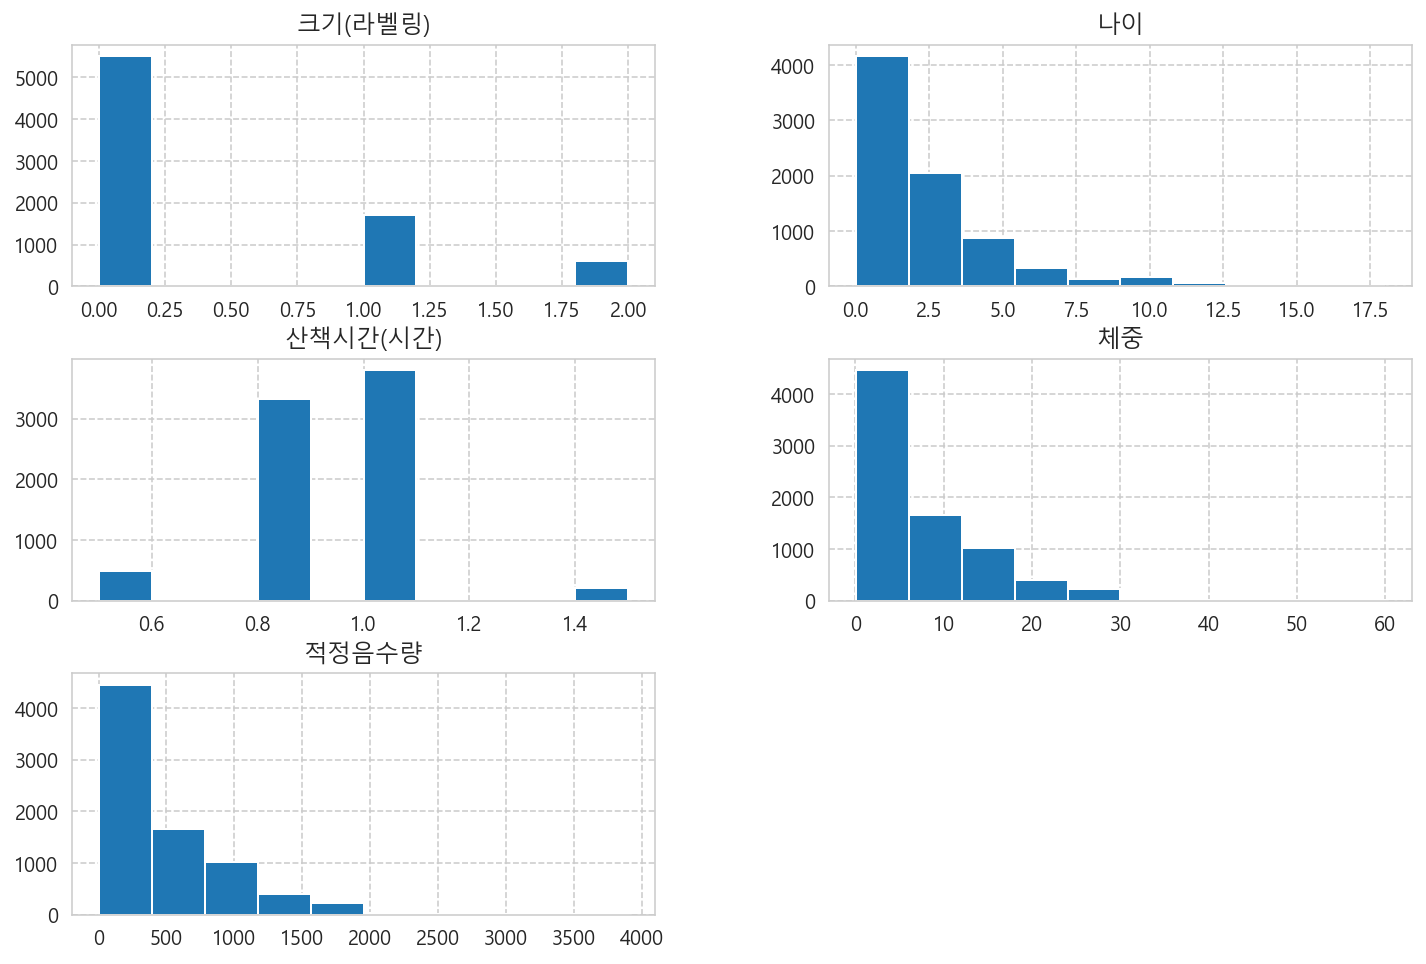

In [23]:
df1.hist(figsize = (12,8))
plt.show()

- 품종, 크기 컬럼은 따로 빼놓자

In [24]:
kind = df1['품종']
size = df1['크기(라벨링)']

In [25]:
print(kind,size)

0       골든 리트리버
1       골든 리트리버
2       골든 리트리버
3       골든 리트리버
4       골든 리트리버
         ...   
7821      핏불테리어
7822     화이트테리어
7823     화이트테리어
7824         휘펫
7825         휘펫
Name: 품종, Length: 7826, dtype: object 0       2
1       2
2       2
3       2
4       2
       ..
7821    2
7822    0
7823    0
7824    1
7825    1
Name: 크기(라벨링), Length: 7826, dtype: int64


In [26]:
del df1['품종']
# del df1['크기(라벨링)']

In [27]:
# 전처리 데이터저장
# df1.to_csv('./pre_dog_data_0708.csv')

In [28]:
# 저장확인
# pd.read_csv('./pre_dog_data_0708.csv', index_col = 0)

# 6. Feature Extraction

In [29]:
df1.head()

,크기(라벨링),나이,산책시간(시간),체중,적정음수량
0,2,13,0.5,27.0,1755.0
1,2,10,0.5,25.0,1625.0
2,2,9,0.5,40.0,2600.0
3,2,8,0.5,28.0,1820.0
4,2,8,0.5,33.0,2145.0


In [30]:
corr_bar = []

for column in df1.columns:
    print(f"{column}과 크기의 상관관계:{df1[column].corr(df1['크기(라벨링)'])}")
    corr_bar.append(df1[column].corr(df1['크기(라벨링)']))

크기(라벨링)과 크기의 상관관계:1.0
나이과 크기의 상관관계:0.16231373343385744
산책시간(시간)과 크기의 상관관계:0.4715765295369687
체중과 크기의 상관관계:0.9169479589896972
적정음수량과 크기의 상관관계:0.9169479589896975


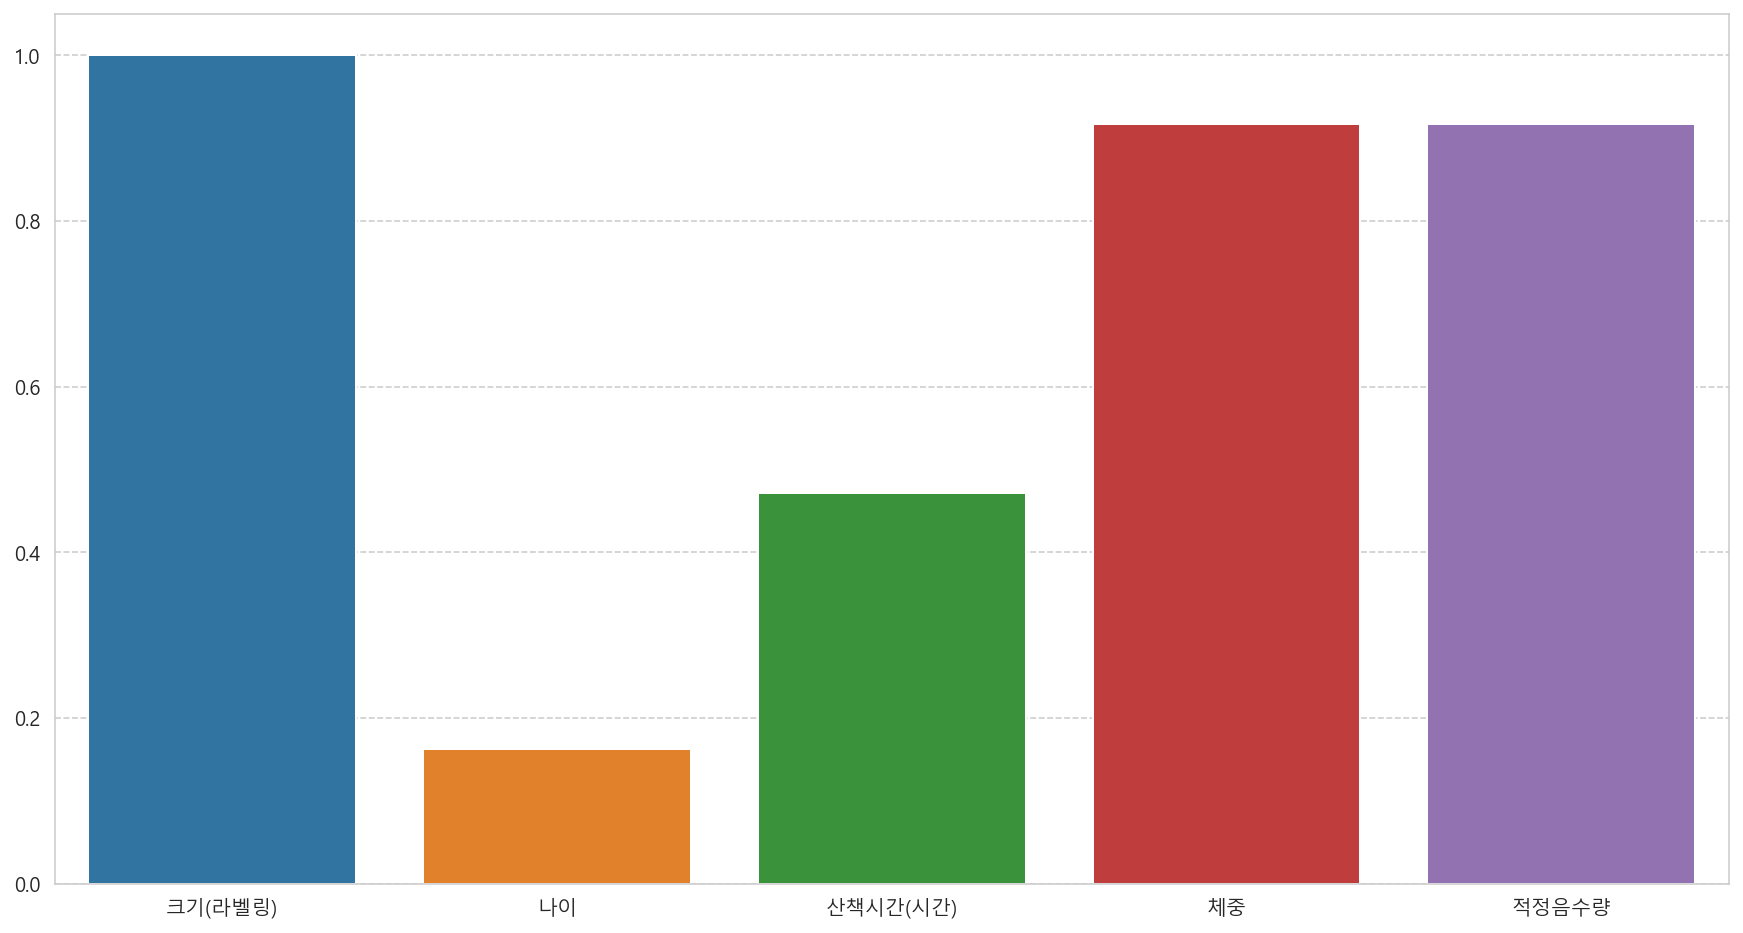

In [31]:
plt.figure(figsize = (15,8))
sns.barplot(df1.columns, corr_bar)
plt.show()

In [32]:
# 크기 삭제
del df1['크기(라벨링)']


# 7. ElbowPoint

In [33]:
# 군집화 라이브러리 불러오기 .
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [34]:
data = df1

In [35]:
from sklearn.cluster import KMeans

In [36]:
x = [] #k가 몇개인지 -
y = [] #응집도가 몇인지 

# 범위가 1~30인 이유
for k in range (1,30): 
    kmeans = KMeans(n_clusters = k) # 1~ 29개의 군집화 된 객체를 kmeans라고 함   
    kmeans.fit(data)               # kmeans에다가 data2를 학습시킬것임 
    
    x.append(k)
    y.append(kmeans.inertia_)

    
#k가 n개 일 때 응집도는 a라고 이해하면 된다 

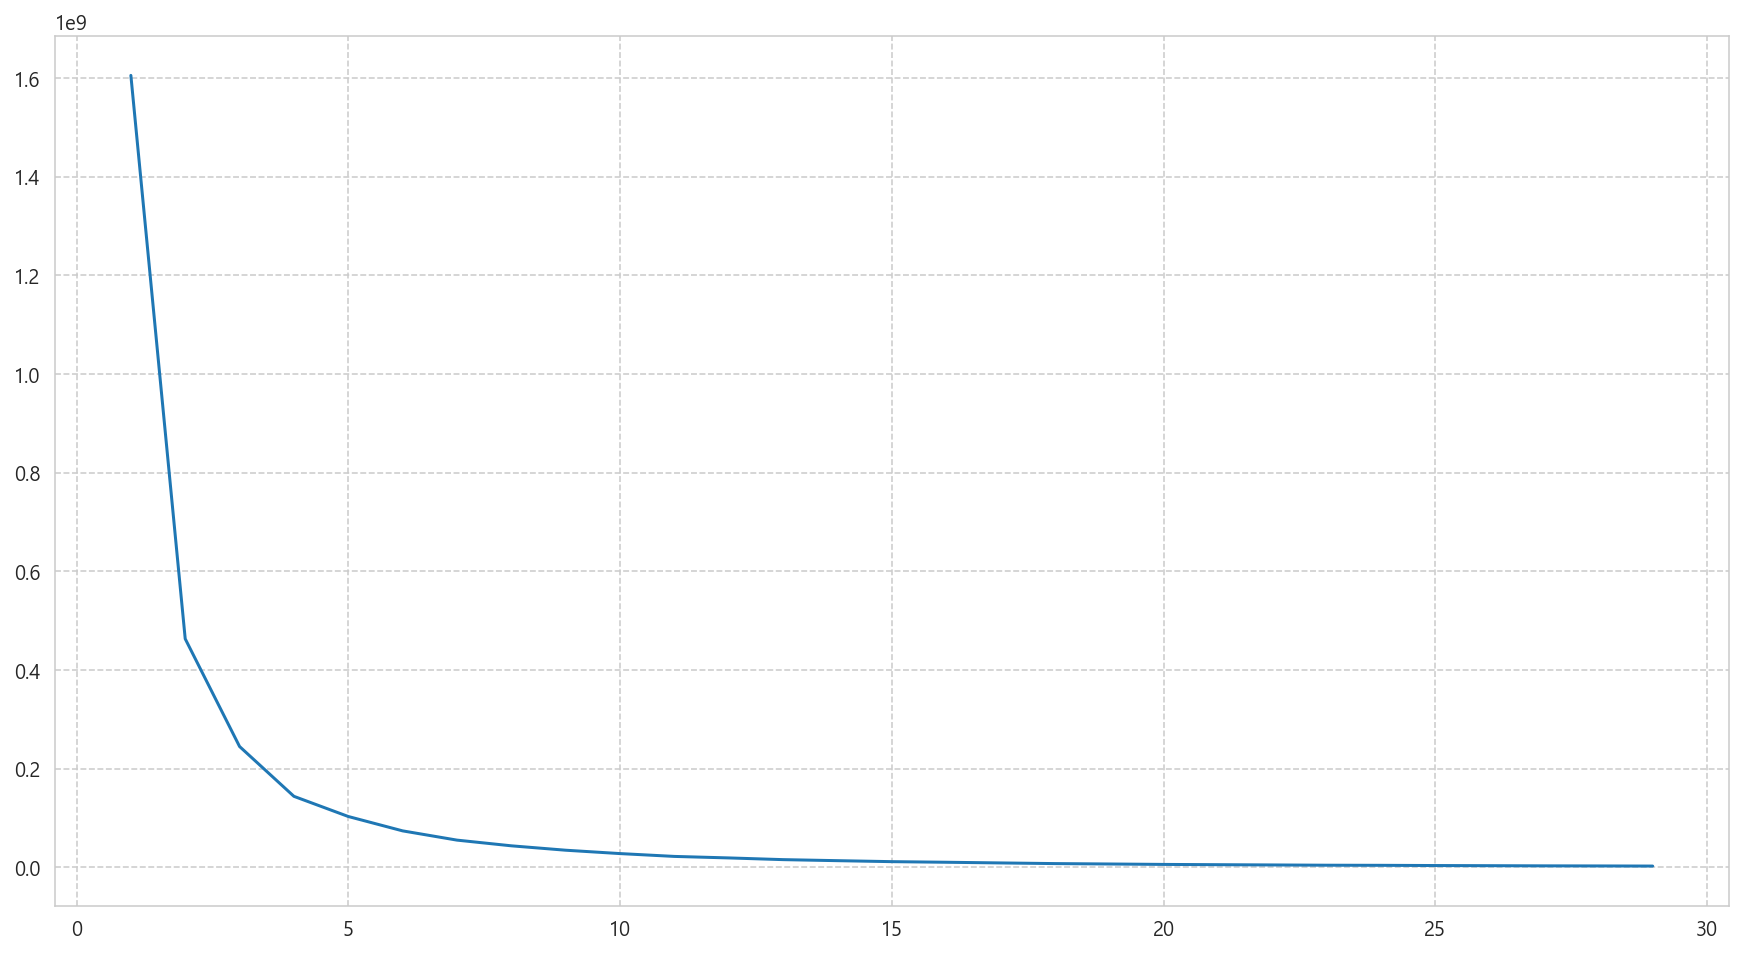

In [37]:
# 그래프 그리기
plt.figure(figsize = (15,8))
plt.plot(x, y)
plt.show()

# 9.군집화(k=4)

In [38]:
# 3개로 군집화 된 객체를 생성 
kmeans = KMeans(n_clusters = 4)

In [39]:
# 군집화 할 데이터 'data2'를 학습시키기 
kmeans.fit(data)

KMeans(n_clusters=4)

In [40]:
# 학습된 kmeans의 응집도 확인 (각 데이터로부터 자신이 속한 군집의 중심까지의 거리)
# 응집도가 낮을수록 군집화가 더 잘되어있는 것이다

In [ ]:
#각 군집 별 중앙 값 
print(kmeans.cluster_centers_[0])
print(kmeans.cluster_centers_[1])
print(kmeans.cluster_centers_[2]) # 얘는 뒤에 e가 붙어서 "*10" 으로 계산해줘야 함 
print(kmeans.cluster_centers_[3])

In [42]:
data

,나이,산책시간(시간),체중,적정음수량
0,13,0.5,27.0,1755.0
1,10,0.5,25.0,1625.0
2,9,0.5,40.0,2600.0
3,8,0.5,28.0,1820.0
4,8,0.5,33.0,2145.0
...,...,...,...,...
7821,2,1.5,25.0,1625.0
7822,13,0.5,7.3,474.5
7823,5,1.5,5.0,325.0
7824,2,1.0,14.0,910.0


In [43]:
data['labels'] = kmeans.predict(data)

In [44]:
data.head()

,나이,산책시간(시간),체중,적정음수량,labels
0,13,0.5,27.0,1755.0,1
1,10,0.5,25.0,1625.0,1
2,9,0.5,40.0,2600.0,1
3,8,0.5,28.0,1820.0,1
4,8,0.5,33.0,2145.0,1


In [45]:
data['labels'].value_counts()

2    4499
0    1814
3    1153
1     360
Name: labels, dtype: int64

In [46]:
scaler = StandardScaler()
scaler_data = scaler.fit_transform(data)

In [47]:
tsne = TSNE()

In [48]:
data_tsne = pd.DataFrame(data = tsne.fit_transform(scaler_data), columns = ['tsne1', 'tsne2']) 

In [49]:
data_tsne['labels'] = data['labels']

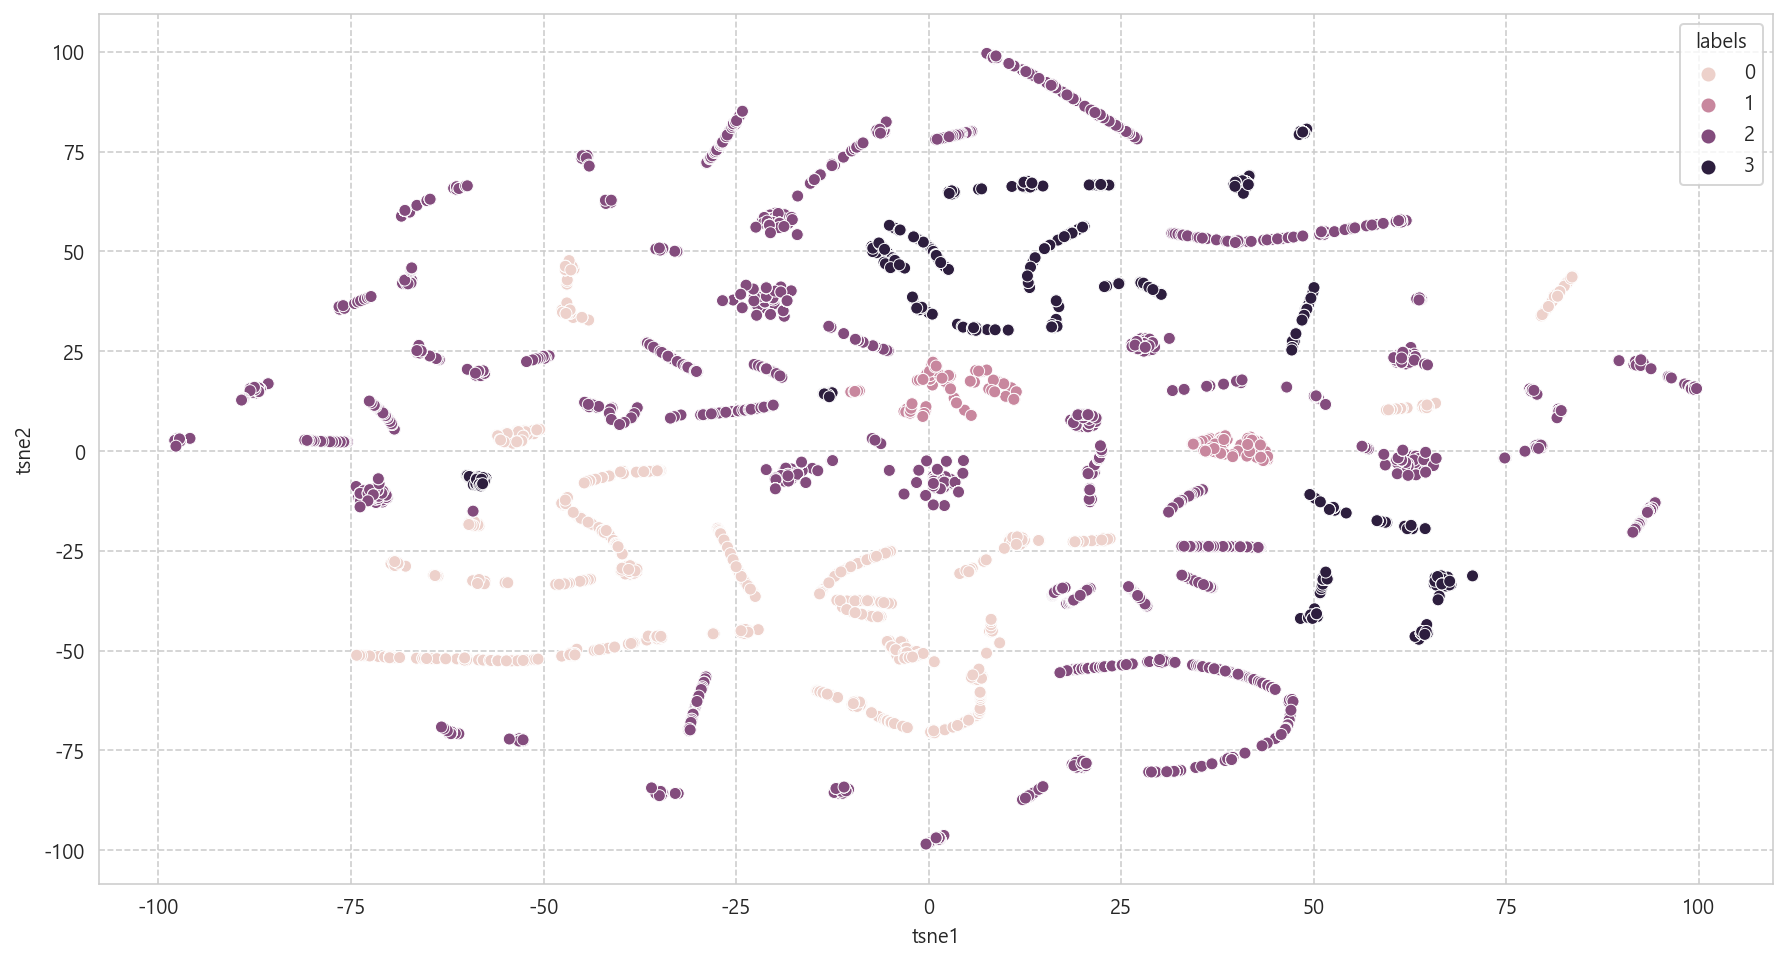

In [50]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'tsne1', y = 'tsne2', hue = 'labels', data = data_tsne)
plt.show()

# 10.결과해석 & 시각화
## (1) 앞에 빼놨던 컬럼 붙이기

In [51]:
data

,나이,산책시간(시간),체중,적정음수량,labels
0,13,0.5,27.0,1755.0,1
1,10,0.5,25.0,1625.0,1
2,9,0.5,40.0,2600.0,1
3,8,0.5,28.0,1820.0,1
4,8,0.5,33.0,2145.0,1
...,...,...,...,...,...
7821,2,1.5,25.0,1625.0,1
7822,13,0.5,7.3,474.5,0
7823,5,1.5,5.0,325.0,2
7824,2,1.0,14.0,910.0,3


In [52]:
df1

,나이,산책시간(시간),체중,적정음수량,labels
0,13,0.5,27.0,1755.0,1
1,10,0.5,25.0,1625.0,1
2,9,0.5,40.0,2600.0,1
3,8,0.5,28.0,1820.0,1
4,8,0.5,33.0,2145.0,1
...,...,...,...,...,...
7821,2,1.5,25.0,1625.0,1
7822,13,0.5,7.3,474.5,0
7823,5,1.5,5.0,325.0,2
7824,2,1.0,14.0,910.0,3


In [53]:
df1['크기'] = size
df1['품종'] = kind
df1['labels'] = data['labels']

In [54]:
df1.head()

,나이,산책시간(시간),체중,적정음수량,labels,크기,품종
0,13,0.5,27.0,1755.0,1,2,골든 리트리버
1,10,0.5,25.0,1625.0,1,2,골든 리트리버
2,9,0.5,40.0,2600.0,1,2,골든 리트리버
3,8,0.5,28.0,1820.0,1,2,골든 리트리버
4,8,0.5,33.0,2145.0,1,2,골든 리트리버


In [55]:
df1.columns.to_list()

['나이', '산책시간(시간)', '체중', '적정음수량', 'labels', '크기', '품종']

In [56]:
df1 = df1[['품종', '크기', '나이', '산책시간(시간)', '체중', '적정음수량', 'labels']]

In [57]:
df1.head()

,품종,크기,나이,산책시간(시간),체중,적정음수량,labels
0,골든 리트리버,2,13,0.5,27.0,1755.0,1
1,골든 리트리버,2,10,0.5,25.0,1625.0,1
2,골든 리트리버,2,9,0.5,40.0,2600.0,1
3,골든 리트리버,2,8,0.5,28.0,1820.0,1
4,골든 리트리버,2,8,0.5,33.0,2145.0,1


## (2) 그룹별 갯수 시각화

In [58]:
(df1['labels'].value_counts(normalize = True)*100).round(1)

2    57.5
0    23.2
3    14.7
1     4.6
Name: labels, dtype: float64

<AxesSubplot:>

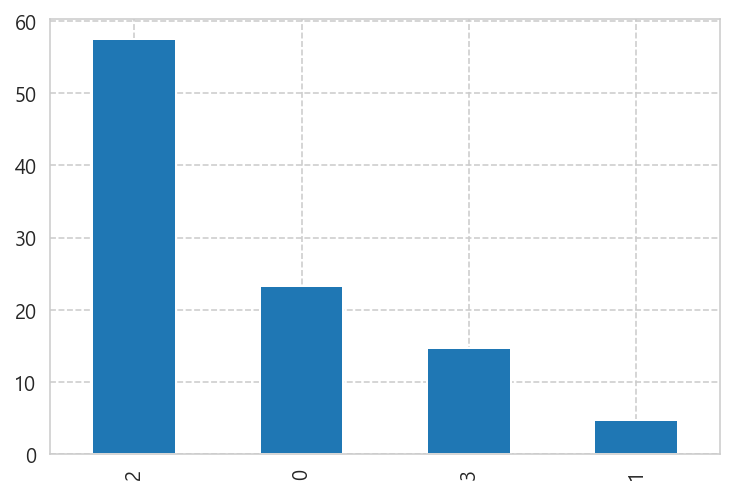

In [59]:
(df1['labels'].value_counts(normalize = True)*100).round(1).plot.bar()

## (3) 그룹별 평균 크기 비교

In [79]:
# 시각화를 위해서 각 그룹별 size을 따로 변수로 생성
size0 = df1[df1['labels'] == 0]['크기'].mean()
size1 = df1[df1['labels'] == 1]['크기'].mean()
size2 = df1[df1['labels'] == 2]['크기'].mean()
size3 = df1[df1['labels'] == 3]['크기'].mean()

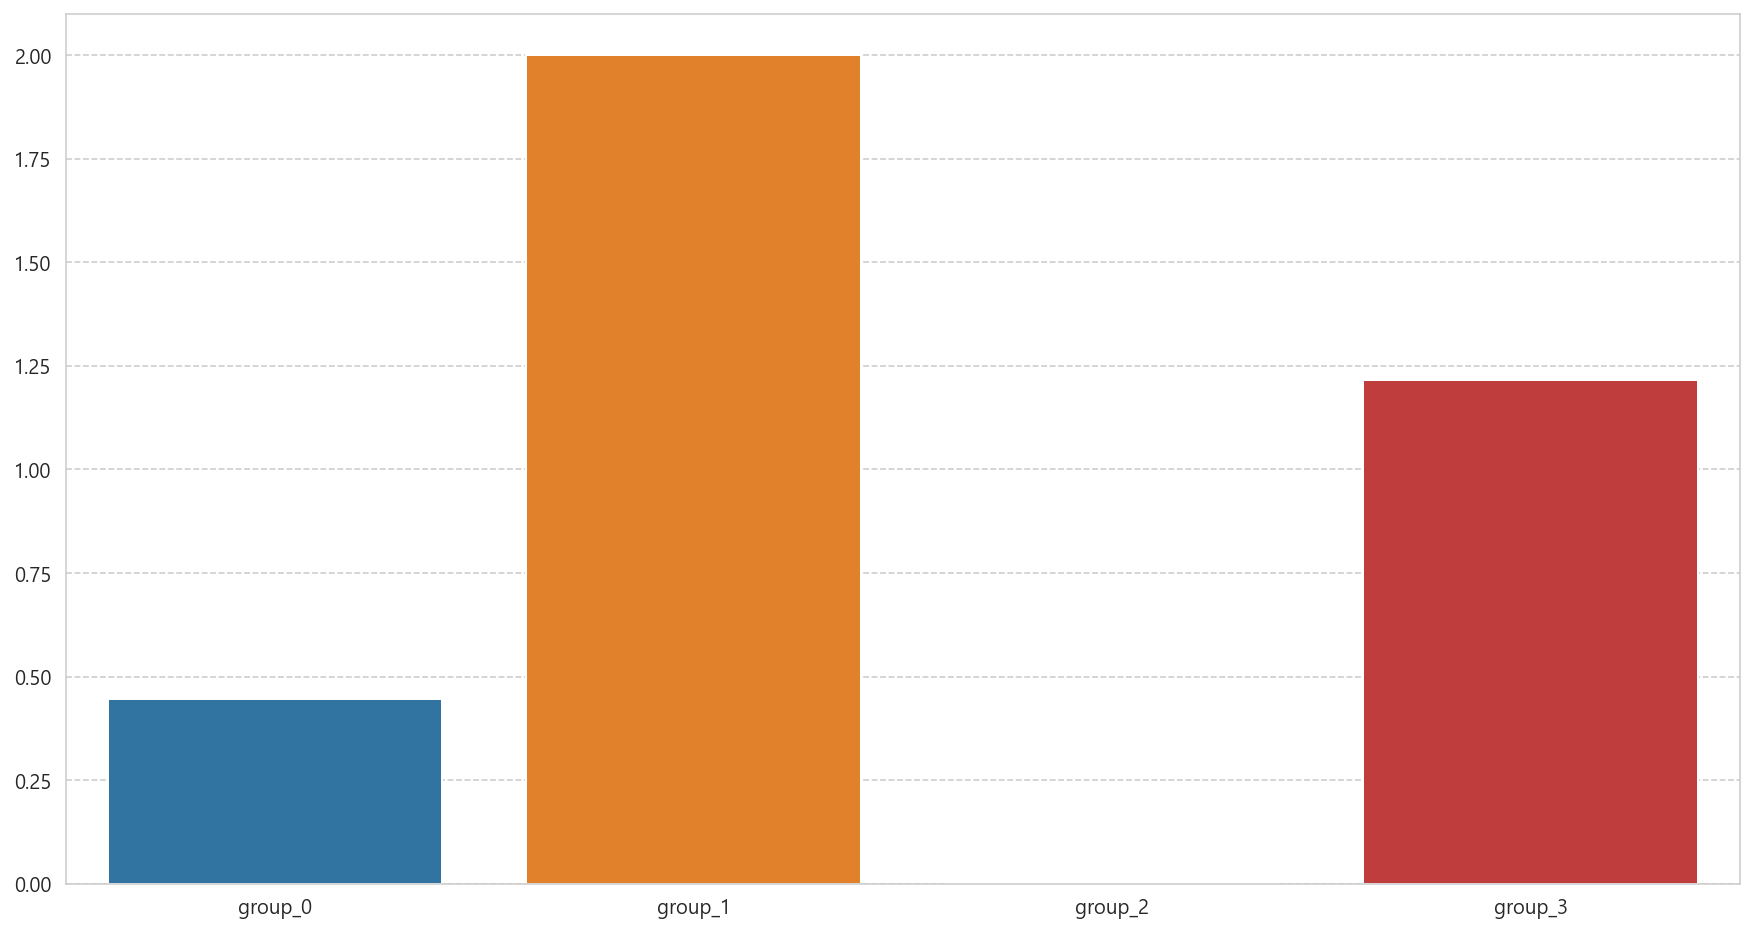

In [80]:
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 랜덤임
plt.figure(figsize = (15,8))
sns.barplot(x = ['group_0', 'group_1', 'group_2', 'group_3'], y = [size0, size1, size2, size3] )
plt.show()

## (4) 그룹별 평균 나이 비교

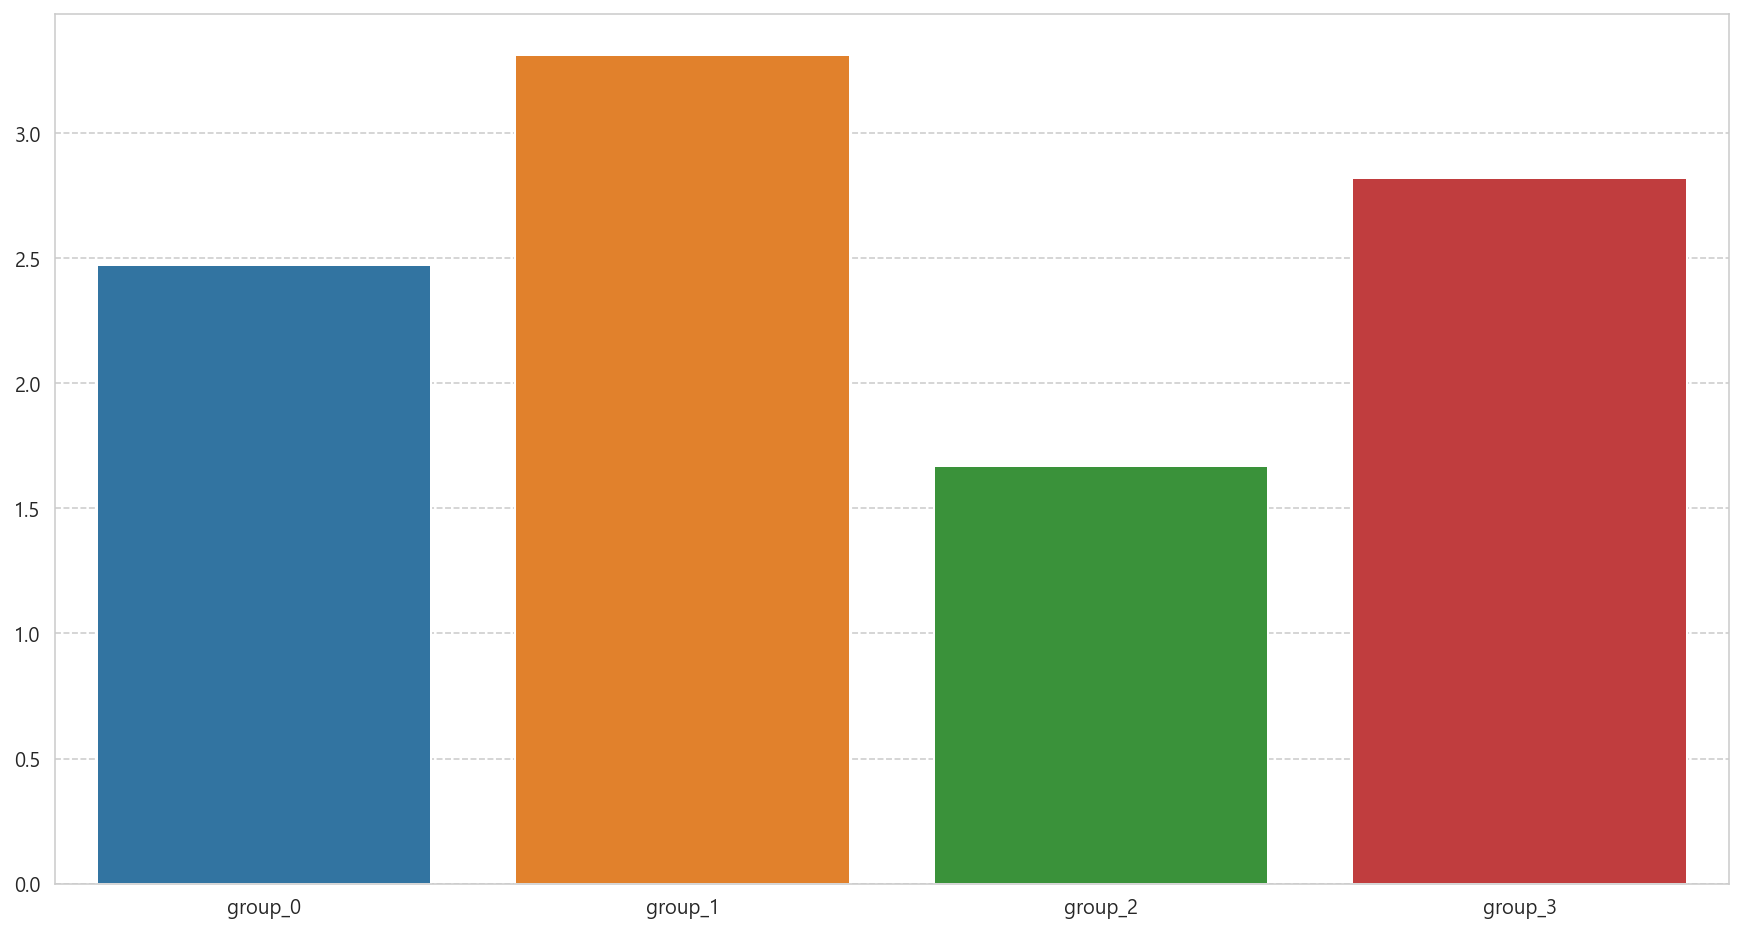

In [81]:
# 시각화를 위해서 각 그룹별 size을 따로 변수로 생성
age0 = df1[df1['labels'] == 0]['나이'].mean()
age1 = df1[df1['labels'] == 1]['나이'].mean()
age2 = df1[df1['labels'] == 2]['나이'].mean()
age3 = df1[df1['labels'] == 3]['나이'].mean()
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 랜덤임
plt.figure(figsize = (15,8))
sns.barplot(x = ['group_0', 'group_1', 'group_2','group_3'], y = [age0, age1, age2, age3] )
plt.show()

## (5) 그룹별 평균 체중비교

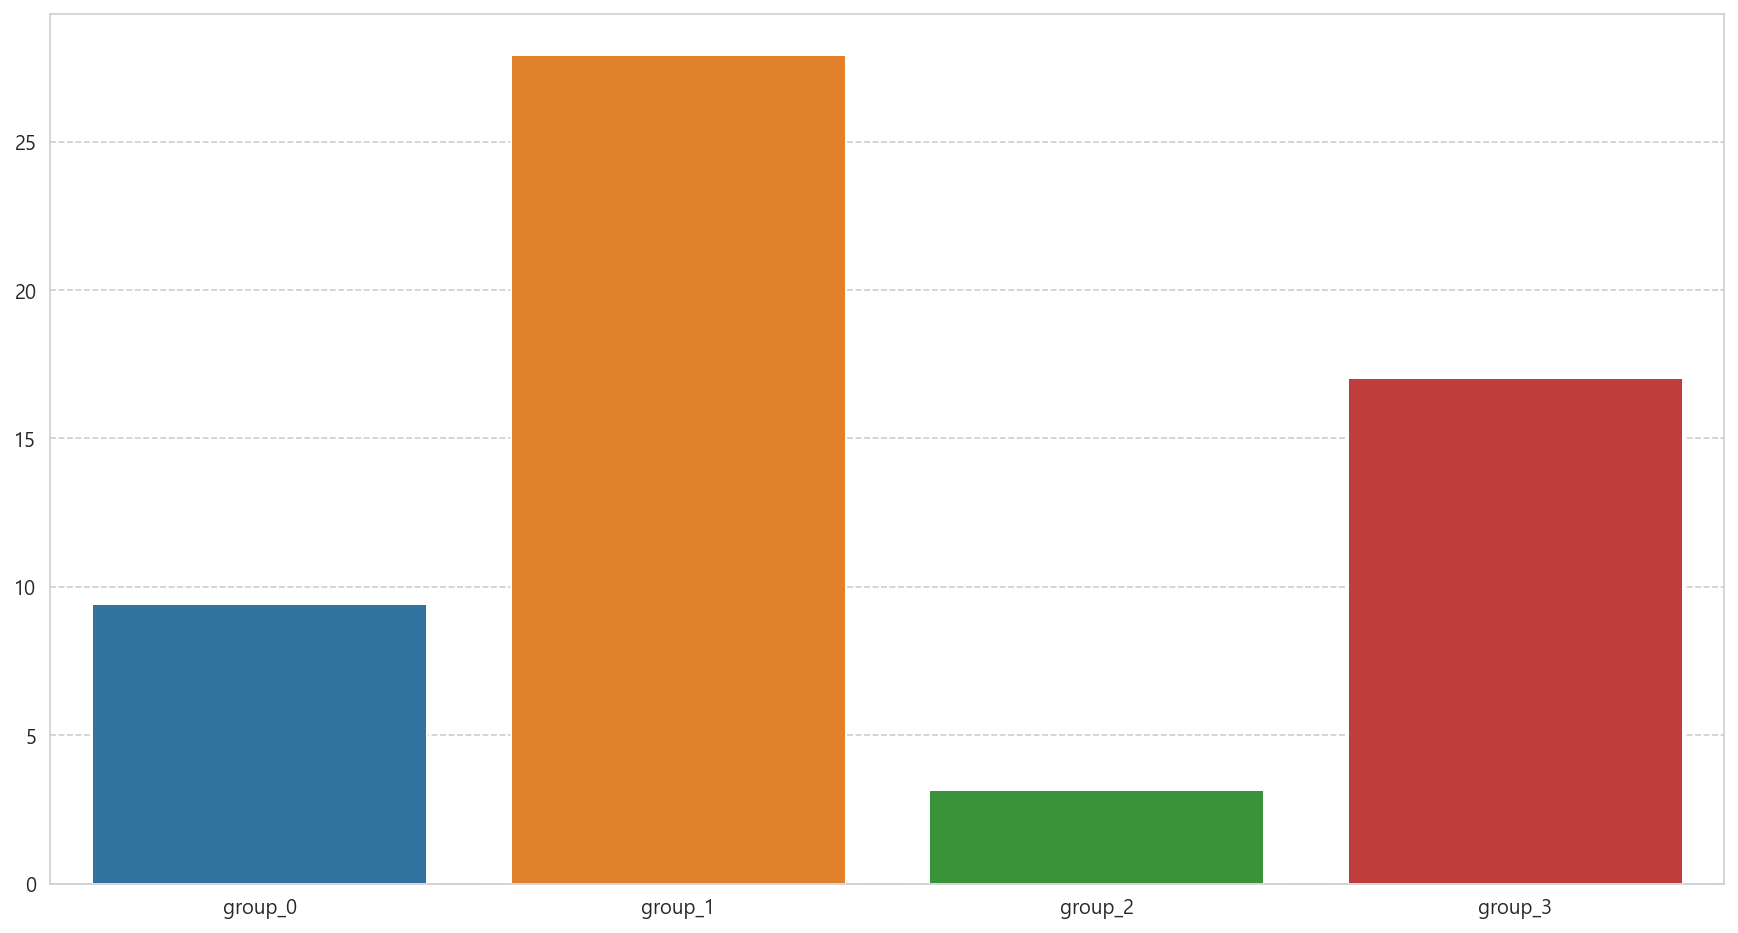

In [82]:
# 시각화를 위해서 각 그룹별 size을 따로 변수로 생성
wgt0 = df1[df1['labels'] == 0]['체중'].mean()
wgt1 = df1[df1['labels'] == 1]['체중'].mean()
wgt2 = df1[df1['labels'] == 2]['체중'].mean()
wgt3 = df1[df1['labels'] == 3]['체중'].mean()
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 랜덤임
plt.figure(figsize = (15,8))
sns.barplot(x = ['group_0', 'group_1', 'group_2', 'group_3'], y = [wgt0, wgt1, wgt2, wgt3] )
plt.show()

## (6) 그룹별 평균 권장 산책시간 비교

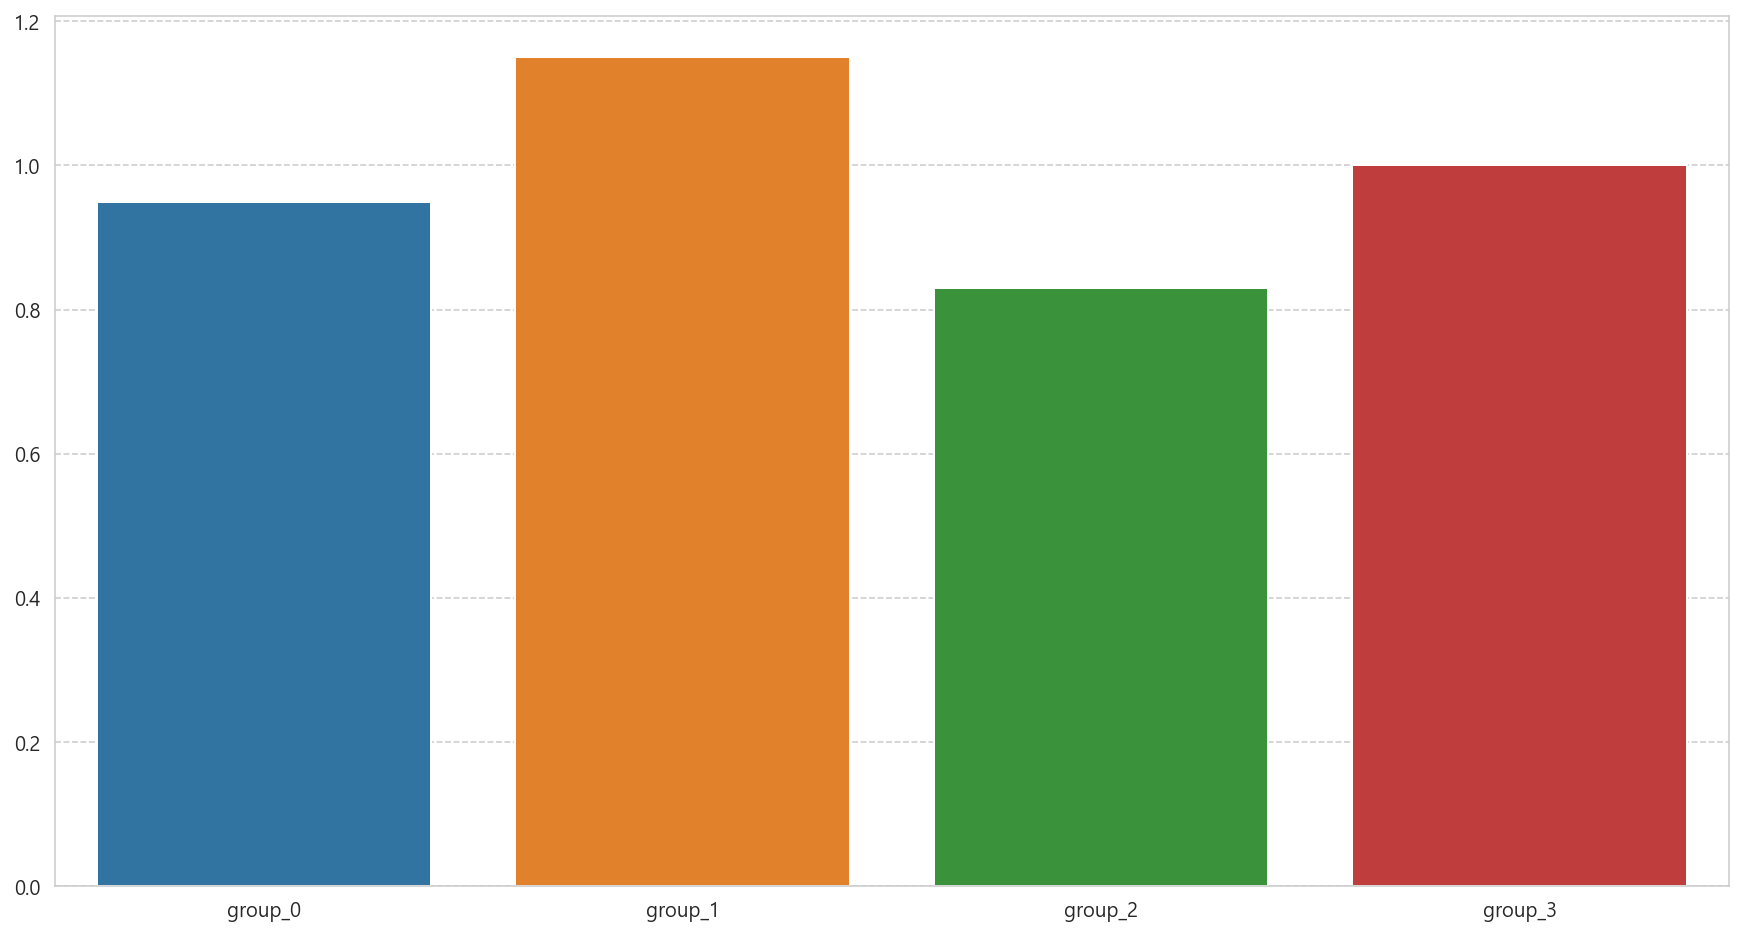

In [83]:
# 시각화를 위해서 각 그룹별 size을 따로 변수로 생성
recom0 = df1[df1['labels'] == 0]['산책시간(시간)'].mean()
recom1 = df1[df1['labels'] == 1]['산책시간(시간)'].mean()
recom2 = df1[df1['labels'] == 2]['산책시간(시간)'].mean()
recom3 = df1[df1['labels'] == 3]['산책시간(시간)'].mean()
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 랜덤임
plt.figure(figsize = (15,8))
sns.barplot(x = ['group_0', 'group_1', 'group_2', 'group_3'], y = [recom0, recom1, recom2, recom3] )
plt.show()

## (7)그룹별 특징
- 나이를 기준으로 비교

In [84]:
df1.head()

,품종,크기,나이,산책시간(시간),체중,적정음수량,labels
0,골든 리트리버,2,13,0.5,27.0,1755.0,1
1,골든 리트리버,2,10,0.5,25.0,1625.0,1
2,골든 리트리버,2,9,0.5,40.0,2600.0,1
3,골든 리트리버,2,8,0.5,28.0,1820.0,1
4,골든 리트리버,2,8,0.5,33.0,2145.0,1


In [85]:
group = df1[(df1['labels']==0) | (df1['labels']==1) | (df1['labels']==2) | (df1['labels']==3) ]

In [86]:
group['labels'].value_counts()

2    4499
0    1814
3    1153
1     360
Name: labels, dtype: int64

In [87]:
group = group.groupby('labels').mean().reset_index()
group

,labels,크기,나이,산책시간(시간),체중,적정음수량
0,0,0.446527,2.472437,0.948622,9.411031,611.717007
1,1,2.000000,3.311111,1.150278,27.909417,1814.112083
2,2,0.000000,1.667482,0.829962,3.160658,205.442765
3,3,1.215091,2.820468,1.000347,17.048968,1108.182914


In [88]:
column = group.columns
column

Index(['labels', '크기', '나이', '산책시간(시간)', '체중', '적정음수량'], dtype='object')

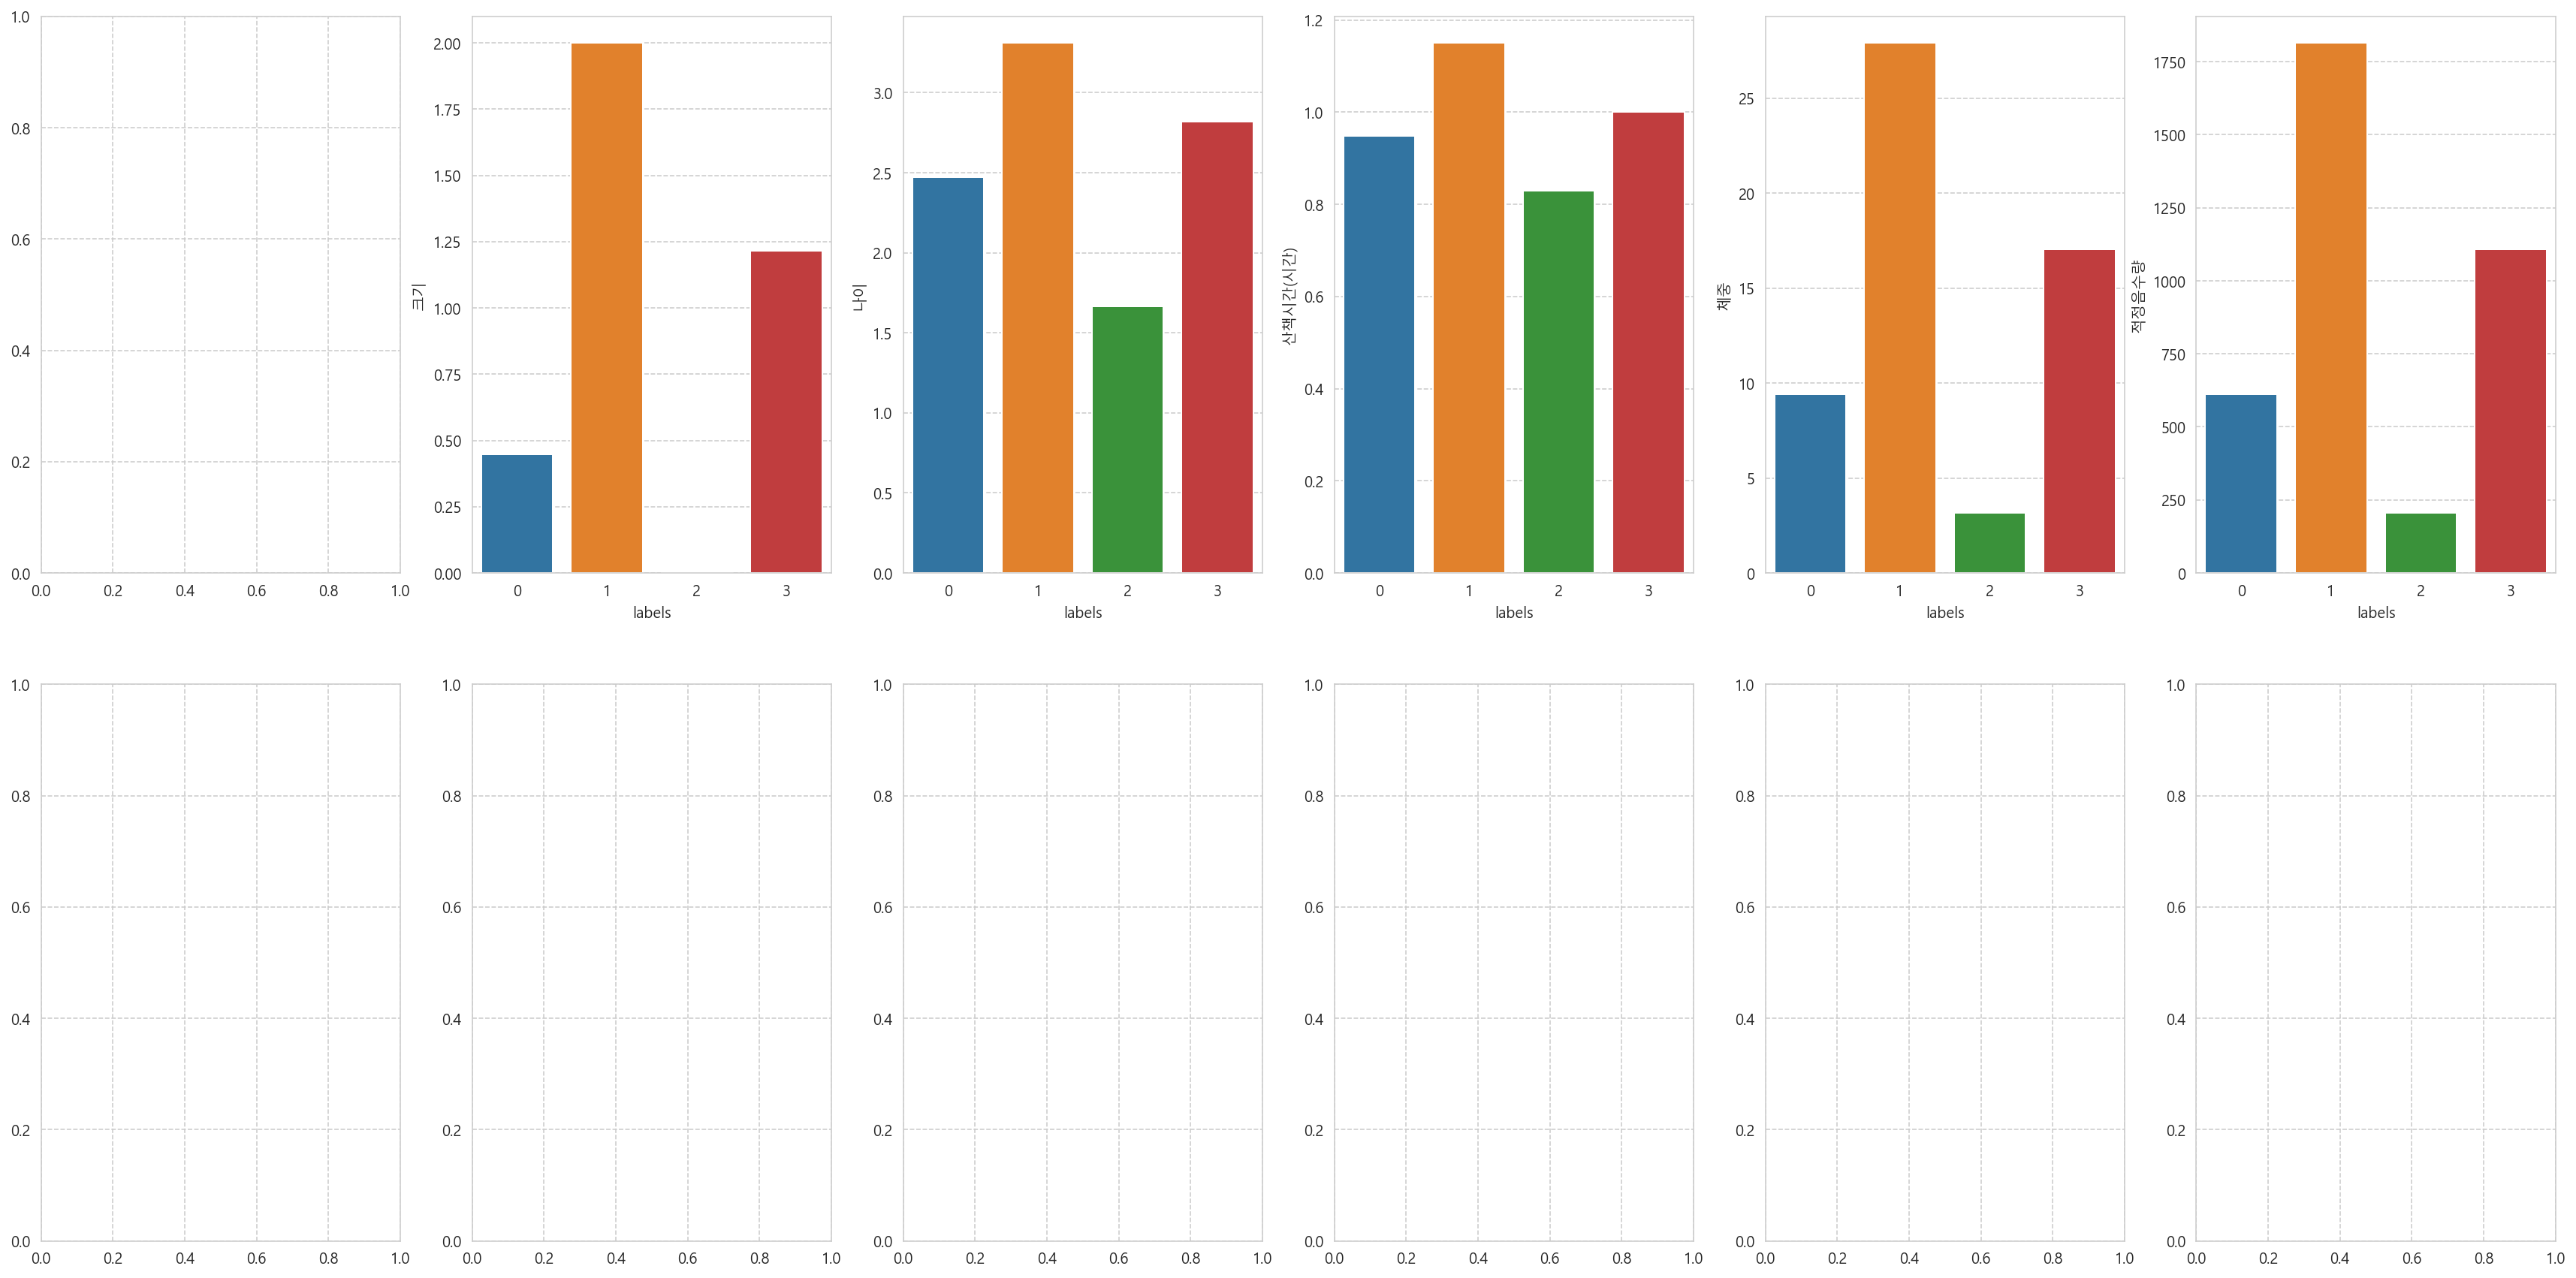

In [89]:
# 반복문으로 그림그리기
f, ax = plt.subplots(2,6,figsize=(30,15))

for i in range(1,6):
        sns.barplot(x='labels', y=column[i], data=group, ax = ax[i//6, i%6])

# sns.barplot(x='labels', y='크기', data = group, ax = ax[0,0])
# sns.barplot(x='labels', y='나이', data = group, ax = ax[0,1])
# sns.barplot(x='labels', y='체중', data = group, ax = ax[1,0])

plt.show()

In [71]:
df1[df1['labels']==0].describe()

,크기,나이,산책시간(시간),체중,적정음수량,labels
count,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.0
mean,0.446527,2.472437,0.948622,9.411031,611.717007,0.0
std,0.497269,2.268774,0.138846,2.046544,133.025391,0.0
min,0.000000,0.000000,0.500000,6.300000,409.500000,0.0
25%,0.000000,1.000000,1.000000,7.600000,494.000000,0.0
50%,0.000000,2.000000,1.000000,9.050000,588.250000,0.0
75%,1.000000,3.000000,1.000000,11.000000,715.000000,0.0
max,1.000000,15.000000,1.500000,13.200000,858.000000,0.0


In [72]:
df1[df1['labels']==1].describe()

,크기,나이,산책시간(시간),체중,적정음수량,labels
count,360.0,360.000000,360.000000,360.000000,360.000000,360.0
mean,2.0,3.311111,1.150278,27.909417,1814.112083,1.0
std,0.0,1.820003,0.278776,5.245735,340.972752,0.0
min,2.0,0.000000,0.500000,22.500000,1462.500000,1.0
25%,2.0,2.000000,1.000000,25.000000,1625.000000,1.0
50%,2.0,3.000000,1.000000,26.000000,1690.000000,1.0
75%,2.0,4.000000,1.500000,30.000000,1950.000000,1.0
max,2.0,13.000000,1.500000,60.000000,3900.000000,1.0


In [73]:
df1[df1['labels']==2].describe()

,크기,나이,산책시간(시간),체중,적정음수량,labels
count,4499.0,4499.000000,4499.000000,4499.000000,4499.000000,4499.0
mean,0.0,1.667482,0.829962,3.160658,205.442765,2.0
std,0.0,2.923759,0.134790,1.528843,99.374816,0.0
min,0.0,0.000000,0.500000,0.040000,2.600000,2.0
25%,0.0,0.000000,0.800000,2.000000,130.000000,2.0
50%,0.0,0.000000,0.800000,3.000000,195.000000,2.0
75%,0.0,2.000000,1.000000,4.300000,279.500000,2.0
max,0.0,18.000000,1.500000,6.260000,406.900000,2.0


In [74]:
df1.head()

,품종,크기,나이,산책시간(시간),체중,적정음수량,labels
0,골든 리트리버,2,13,0.5,27.0,1755.0,1
1,골든 리트리버,2,10,0.5,25.0,1625.0,1
2,골든 리트리버,2,9,0.5,40.0,2600.0,1
3,골든 리트리버,2,8,0.5,28.0,1820.0,1
4,골든 리트리버,2,8,0.5,33.0,2145.0,1


In [75]:
df1[df1['labels'] == 0]['품종'].value_counts().head(20)


믹스견         1385
시바견           53
푸들            52
웰시코기          38
프렌치불독         34
스피츠           33
진도견           22
닥스훈트          19
비숑 프리제        17
코카스파니엘        15
시츄            13
퍼그            10
보더콜리           9
보스턴테리어         9
포메라니안          9
슈나우져           9
말티즈            8
비글             7
베들링턴 테리어       5
불독             5
Name: 품종, dtype: int64

In [76]:
df1[df1['labels'] == 1]['품종'].value_counts().head(20)

믹스견           116
라브라도리트리버       65
골든 리트리버        53
진도견            26
시베리안허스키        15
셰퍼드            13
말라뮤트           10
도사              9
풍산견             8
포인터             3
삽살              3
보더콜리            3
스탠다드 푸들         3
로트와일러           3
그레이트피레니즈        3
올드 잉글리쉬 쉽독      2
도베르만            2
아메리칸 아키다        2
케인 코르소          2
차우차우            2
Name: 품종, dtype: int64

In [77]:
df1[df1['labels'] == 2]['품종'].value_counts().head(20)

믹스견         3354
말티즈          340
푸들           250
포메라니안        158
치와와           68
시츄            63
요크셔 테리어       47
비숑 프리제        32
닥스훈트          28
진도견           25
풍산견           19
스피츠           19
미니어쳐핀셔        11
슈나우져          11
프렌치불독         10
시바견            8
라브라도리트리버       8
라이카            5
보스턴테리어         4
페키니즈           4
Name: 품종, dtype: int64

In [90]:
df1.head()

,품종,크기,나이,산책시간(시간),체중,적정음수량,labels
0,골든 리트리버,2,13,0.5,27.0,1755.0,1
1,골든 리트리버,2,10,0.5,25.0,1625.0,1
2,골든 리트리버,2,9,0.5,40.0,2600.0,1
3,골든 리트리버,2,8,0.5,28.0,1820.0,1
4,골든 리트리버,2,8,0.5,33.0,2145.0,1


In [91]:
df1[df1['labels']==1].describe()

,크기,나이,산책시간(시간),체중,적정음수량,labels
count,360.0,360.000000,360.000000,360.000000,360.000000,360.0
mean,2.0,3.311111,1.150278,27.909417,1814.112083,1.0
std,0.0,1.820003,0.278776,5.245735,340.972752,0.0
min,2.0,0.000000,0.500000,22.500000,1462.500000,1.0
25%,2.0,2.000000,1.000000,25.000000,1625.000000,1.0
50%,2.0,3.000000,1.000000,26.000000,1690.000000,1.0
75%,2.0,4.000000,1.500000,30.000000,1950.000000,1.0
max,2.0,13.000000,1.500000,60.000000,3900.000000,1.0


<AxesSubplot:>

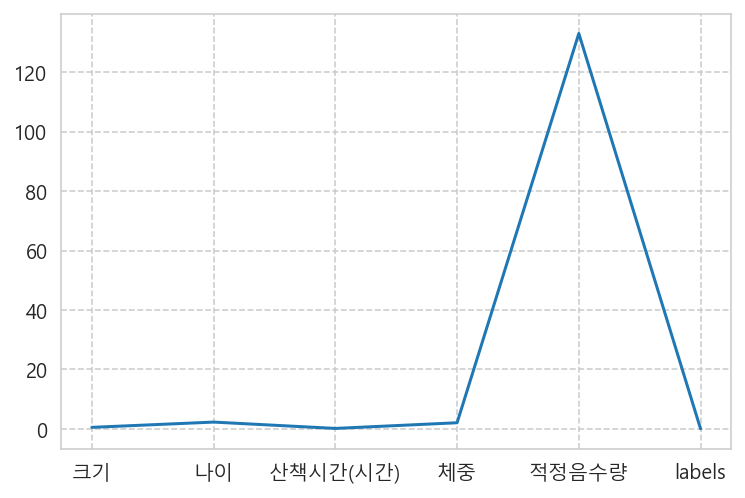

In [93]:
df1[df1['labels']==0].std().plot()

In [92]:
df1.describe()

,크기,나이,산책시간(시간),체중,적정음수량,labels
count,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000
mean,0.374521,2.099540,0.897304,7.794053,506.613455,1.637746
std,0.624247,2.647694,0.168873,6.967980,452.918710,0.994683
min,0.000000,0.000000,0.500000,0.040000,2.600000,0.000000
25%,0.000000,0.000000,0.800000,3.000000,195.000000,1.000000
50%,0.000000,1.000000,1.000000,5.000000,325.000000,2.000000
75%,1.000000,3.000000,1.000000,11.000000,715.000000,2.000000
max,2.000000,18.000000,1.500000,60.000000,3900.000000,3.000000


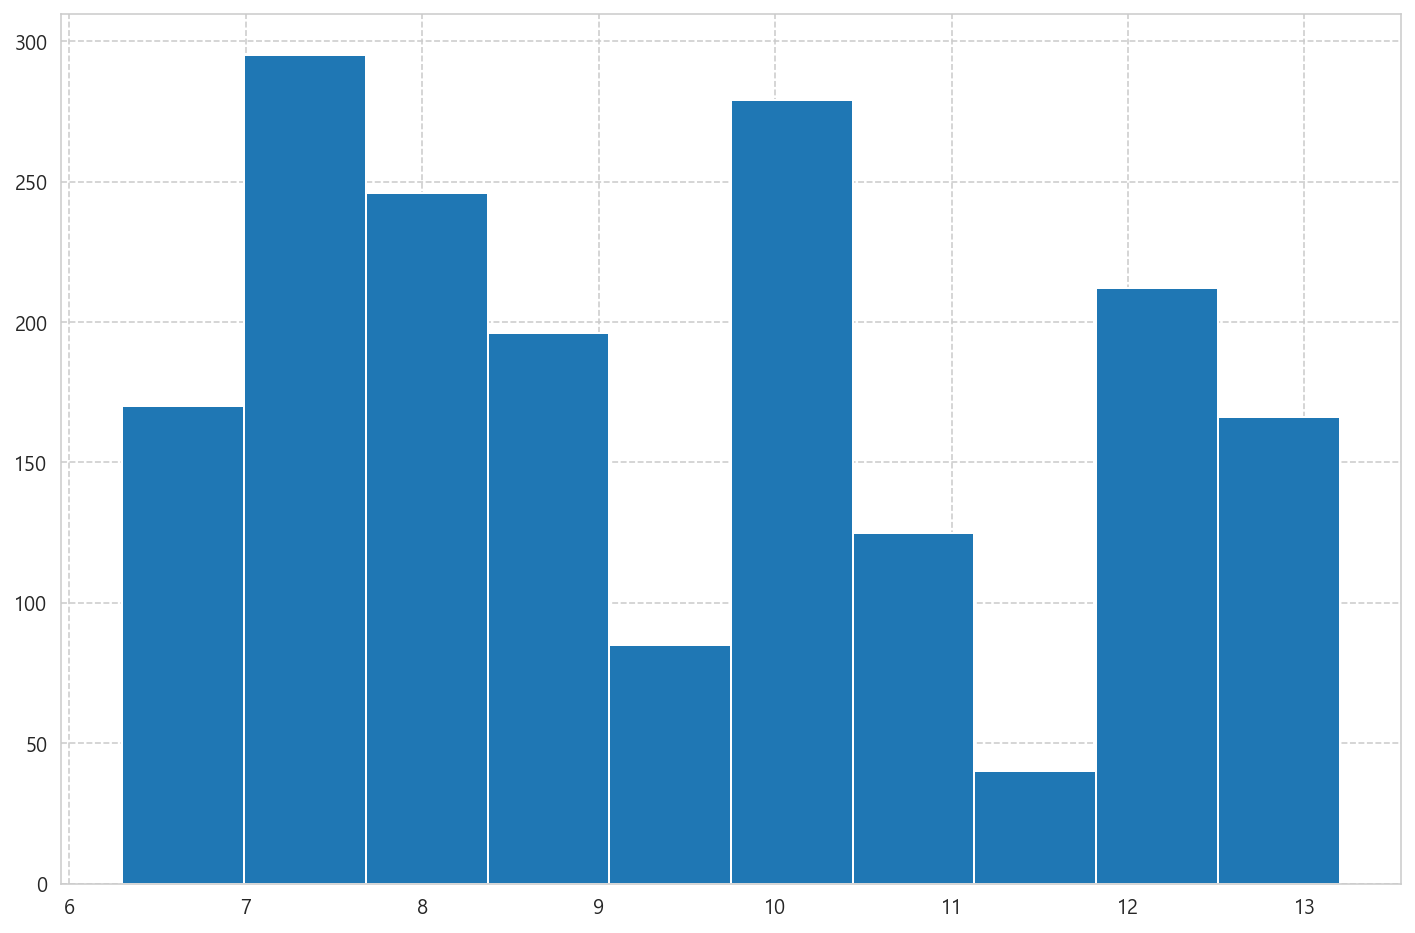

In [94]:
plt.figure(figsize=(12,8))
df1[df1['labels']==0]['체중'].hist()
plt.show()

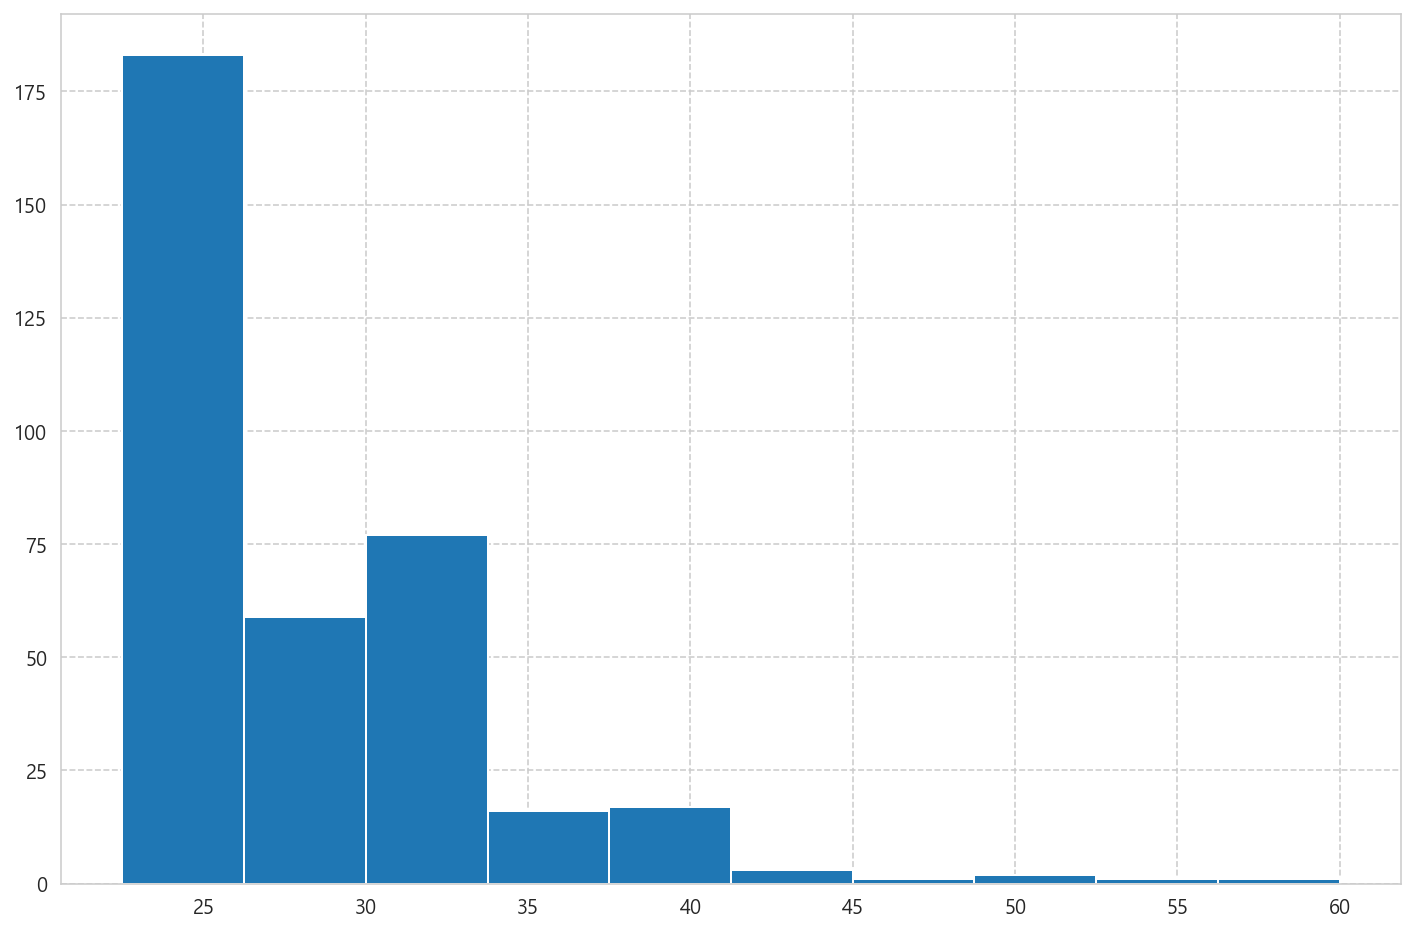

In [95]:
plt.figure(figsize=(12,8))
df1[df1['labels']==1]['체중'].hist()
plt.show()

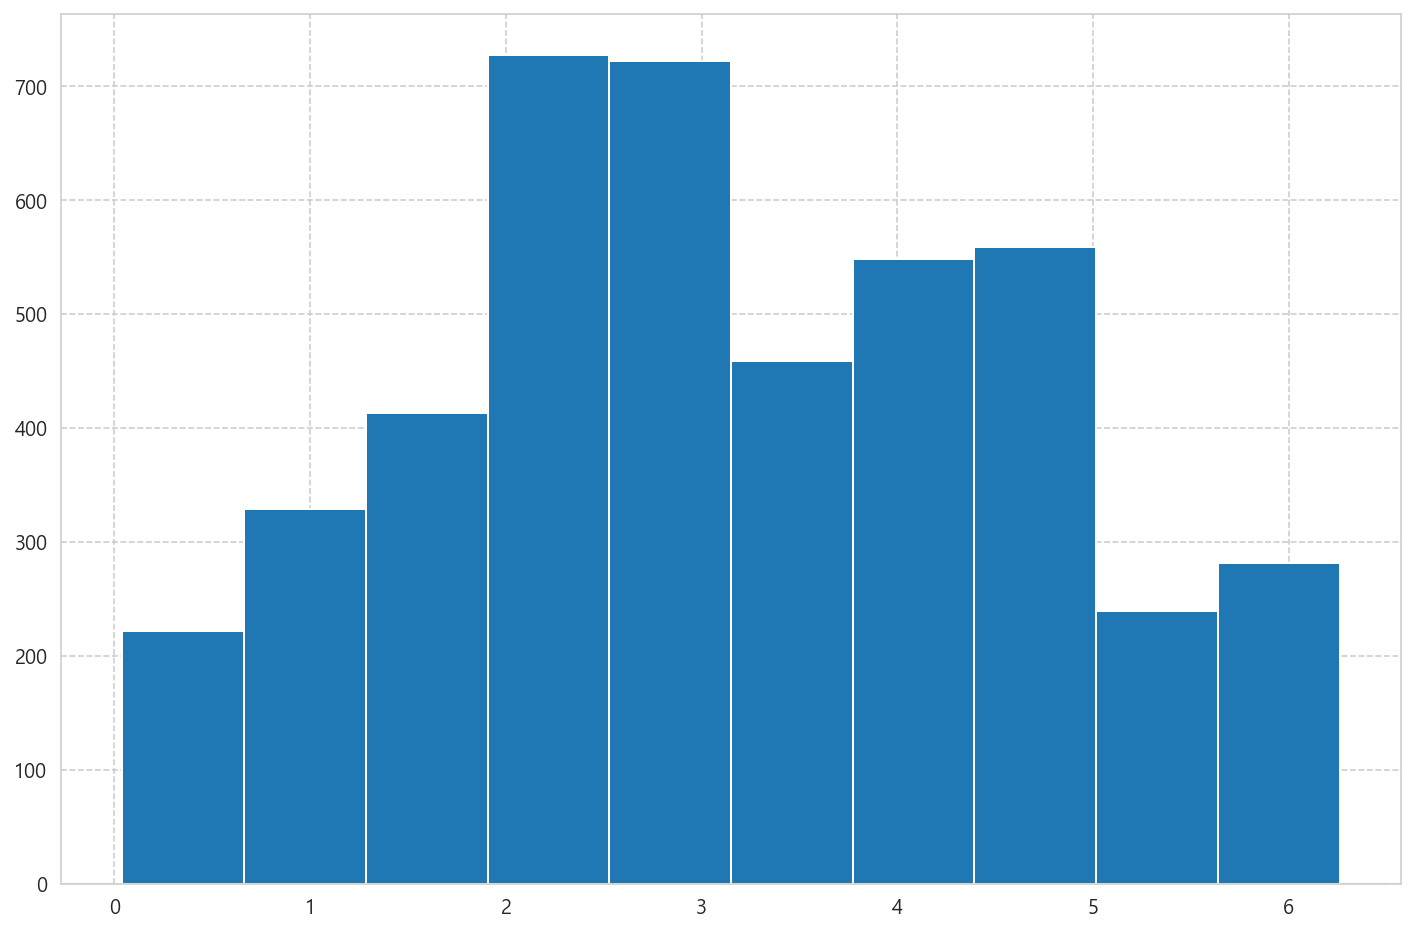

In [96]:
plt.figure(figsize=(12,8))
df1[df1['labels']==2]['체중'].hist()
plt.show()


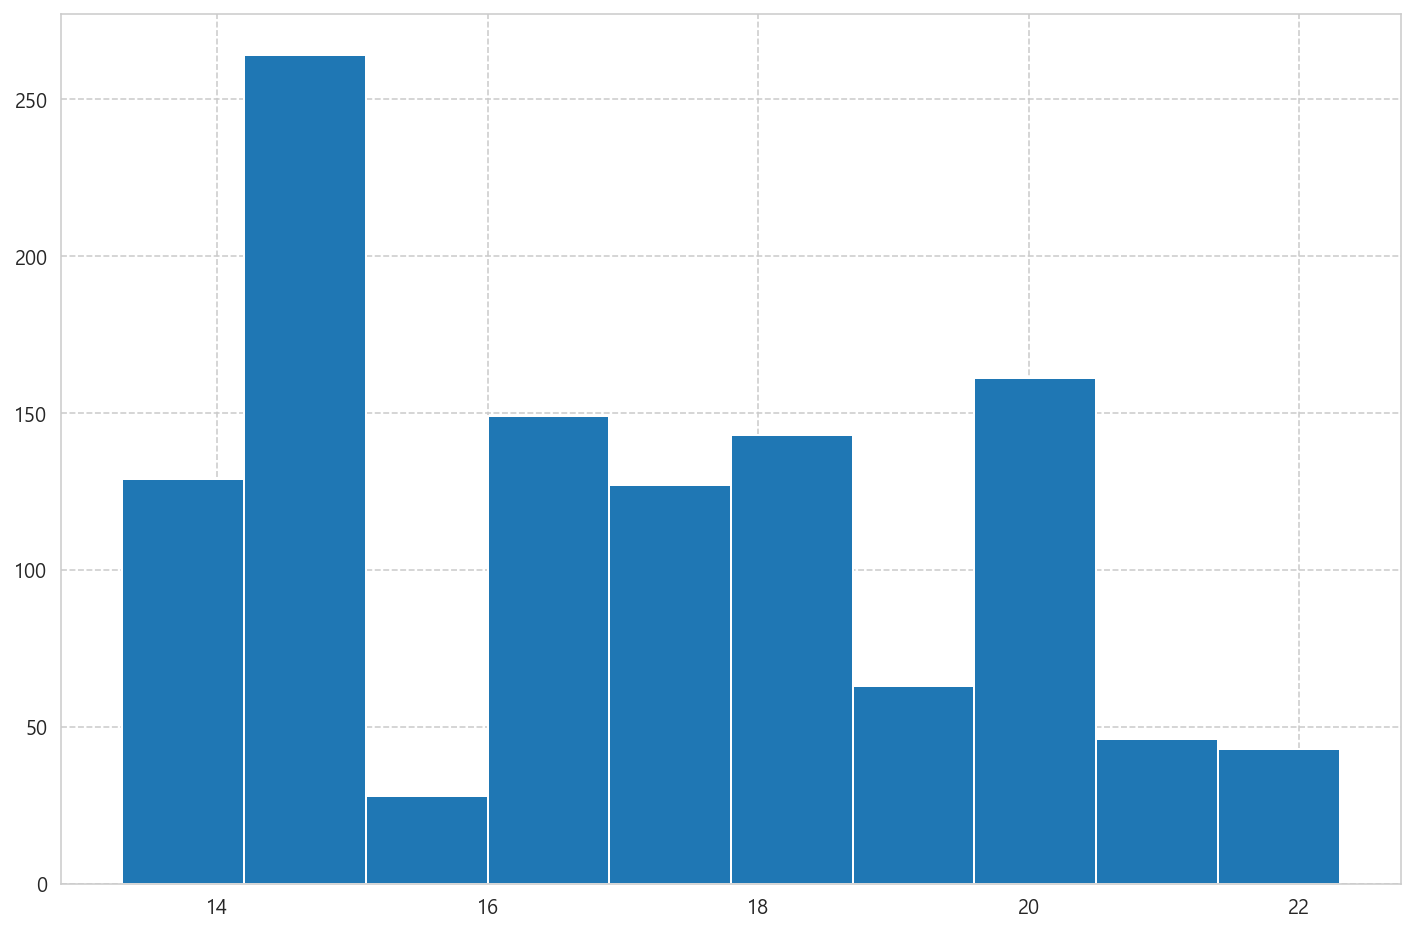

In [97]:
plt.figure(figsize=(12,8))
df1[df1['labels']==3]['체중'].hist()
plt.show()


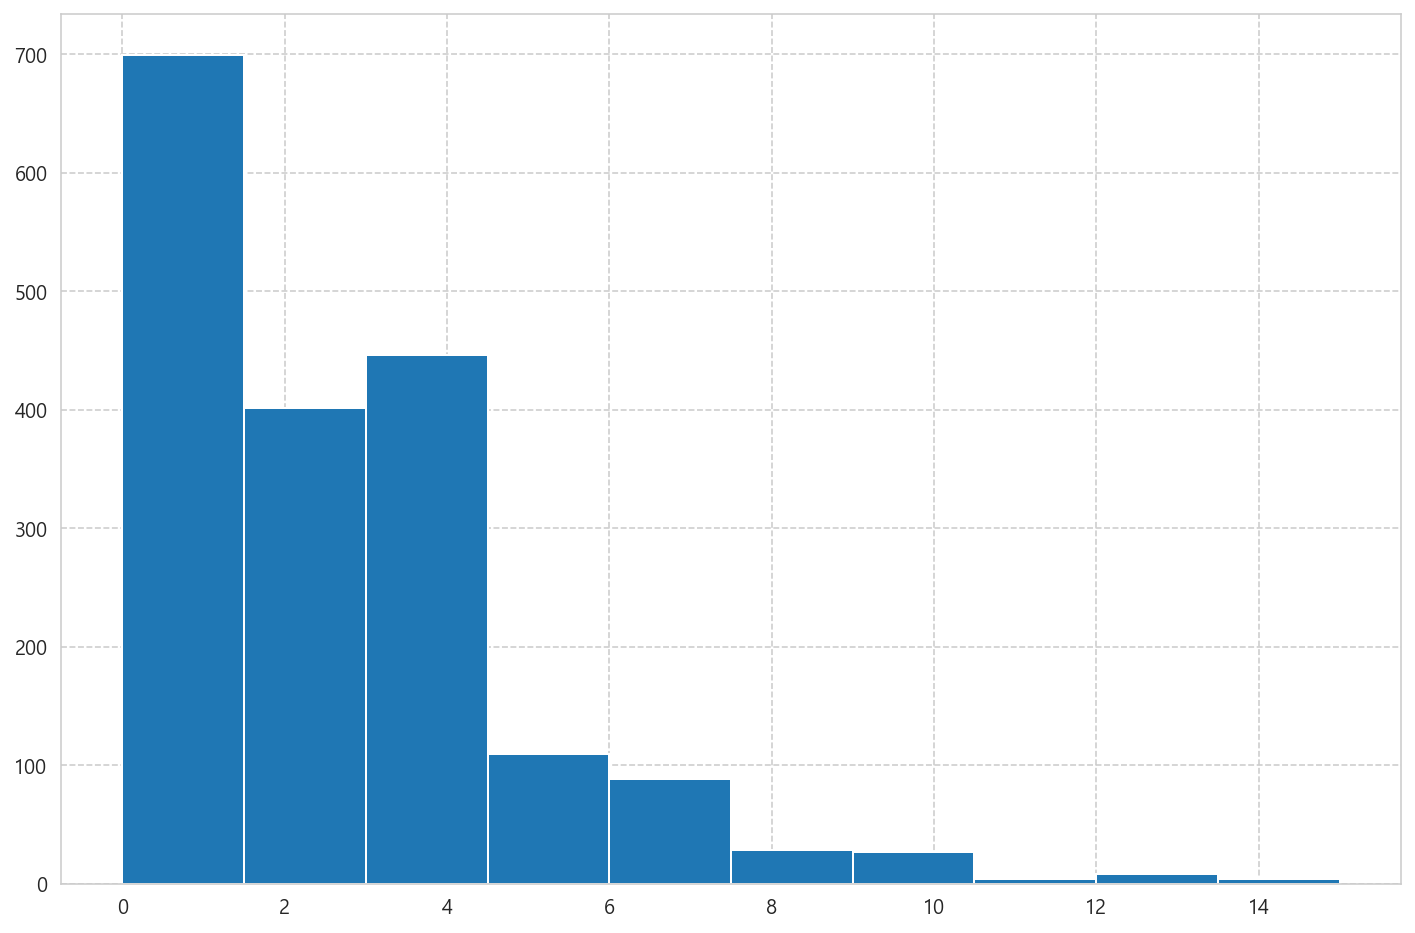

In [98]:
plt.figure(figsize=(12,8))
df1[df1['labels']==0]['나이'].hist()
plt.show()

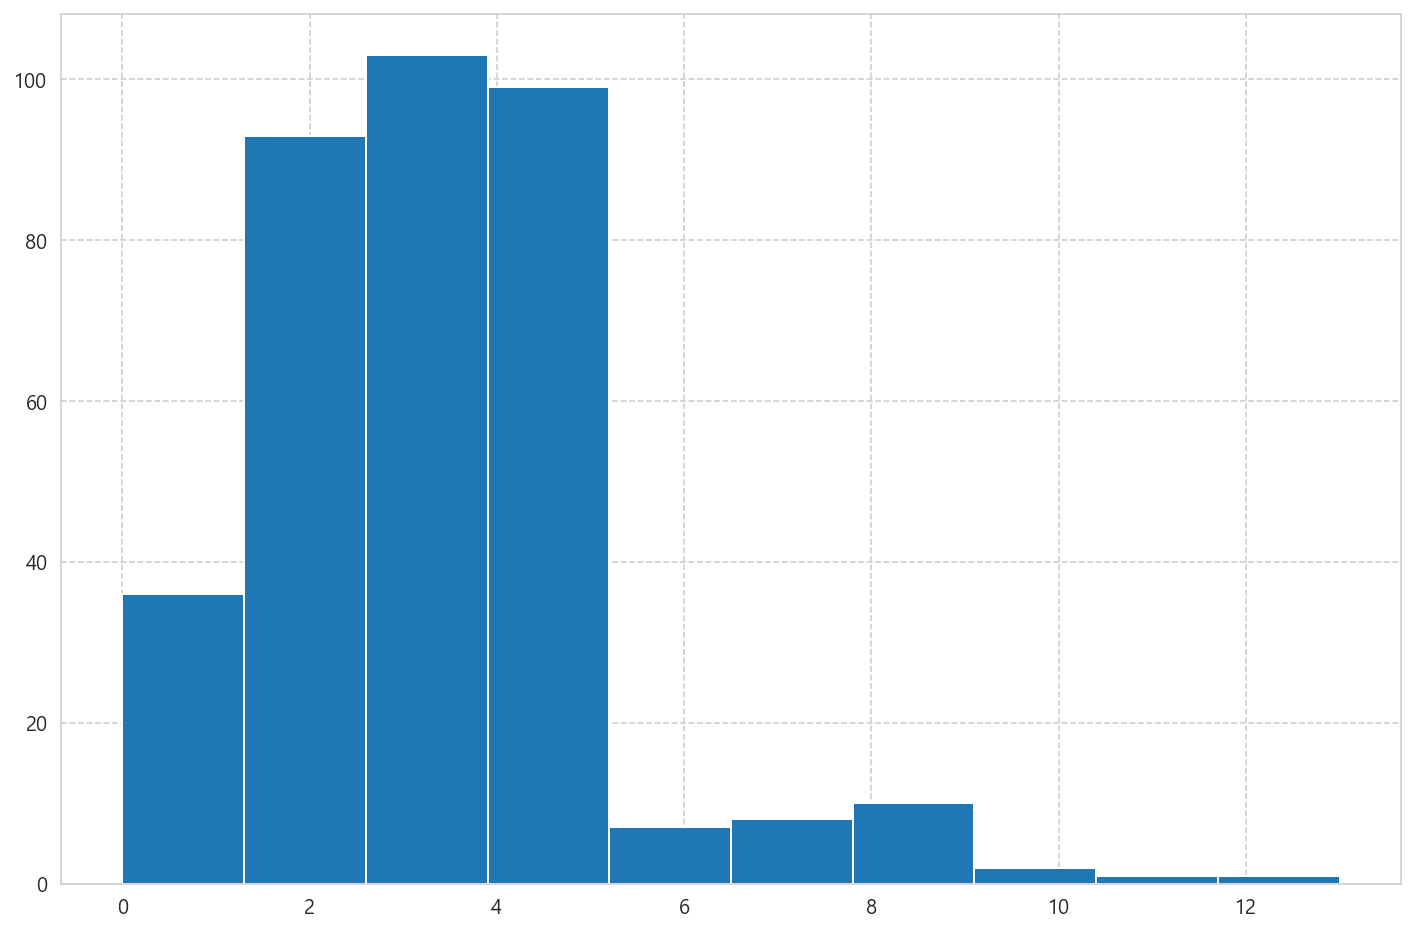

In [99]:
plt.figure(figsize=(12,8))
df1[df1['labels']==1]['나이'].hist()
plt.show()

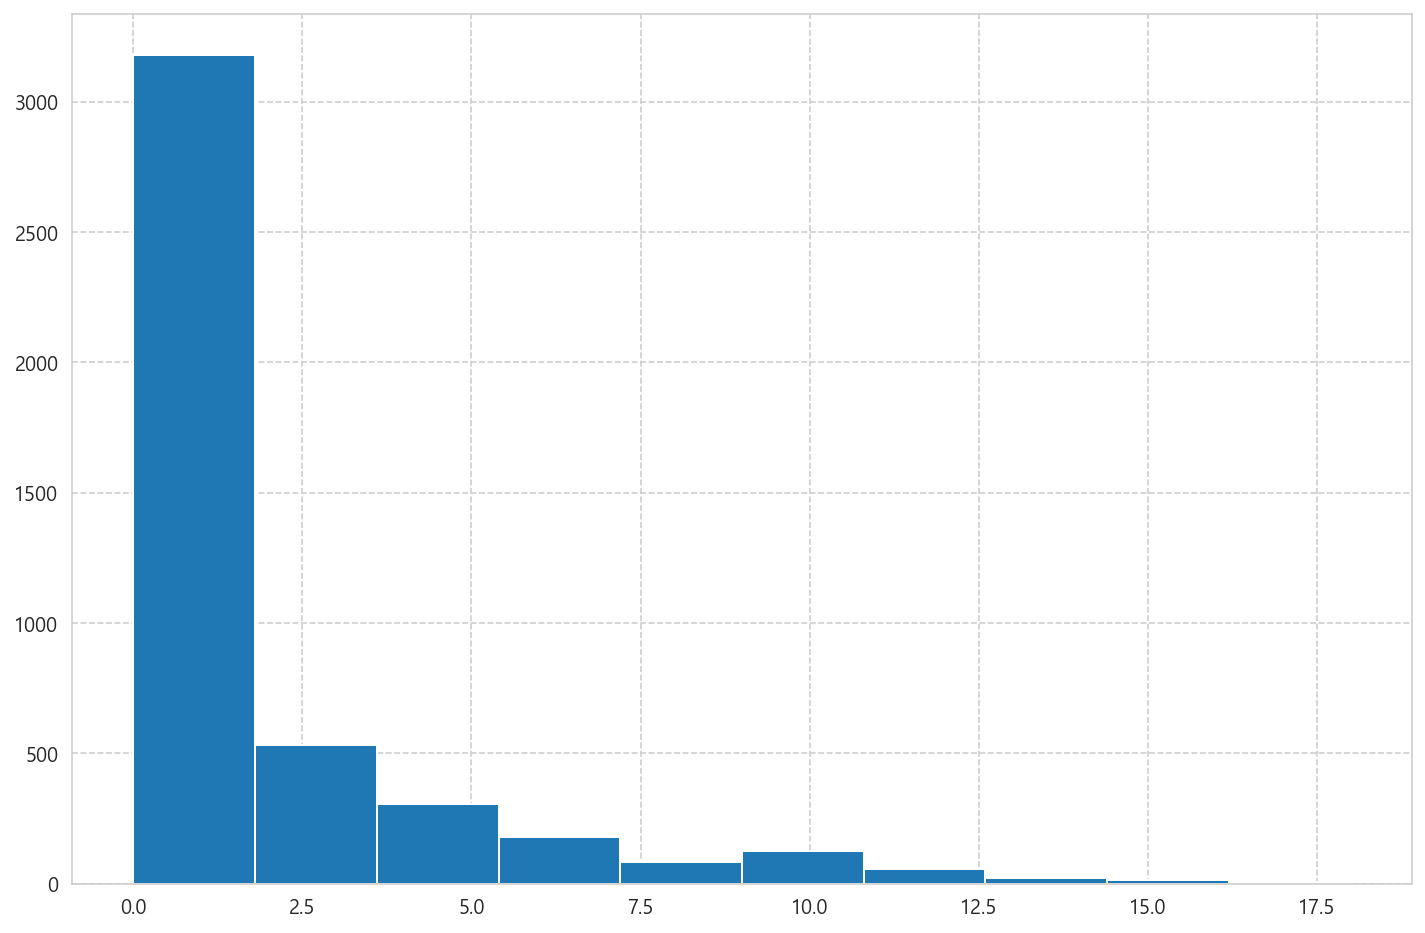

In [100]:
plt.figure(figsize=(12,8))
df1[df1['labels']==2]['나이'].hist()
plt.show()

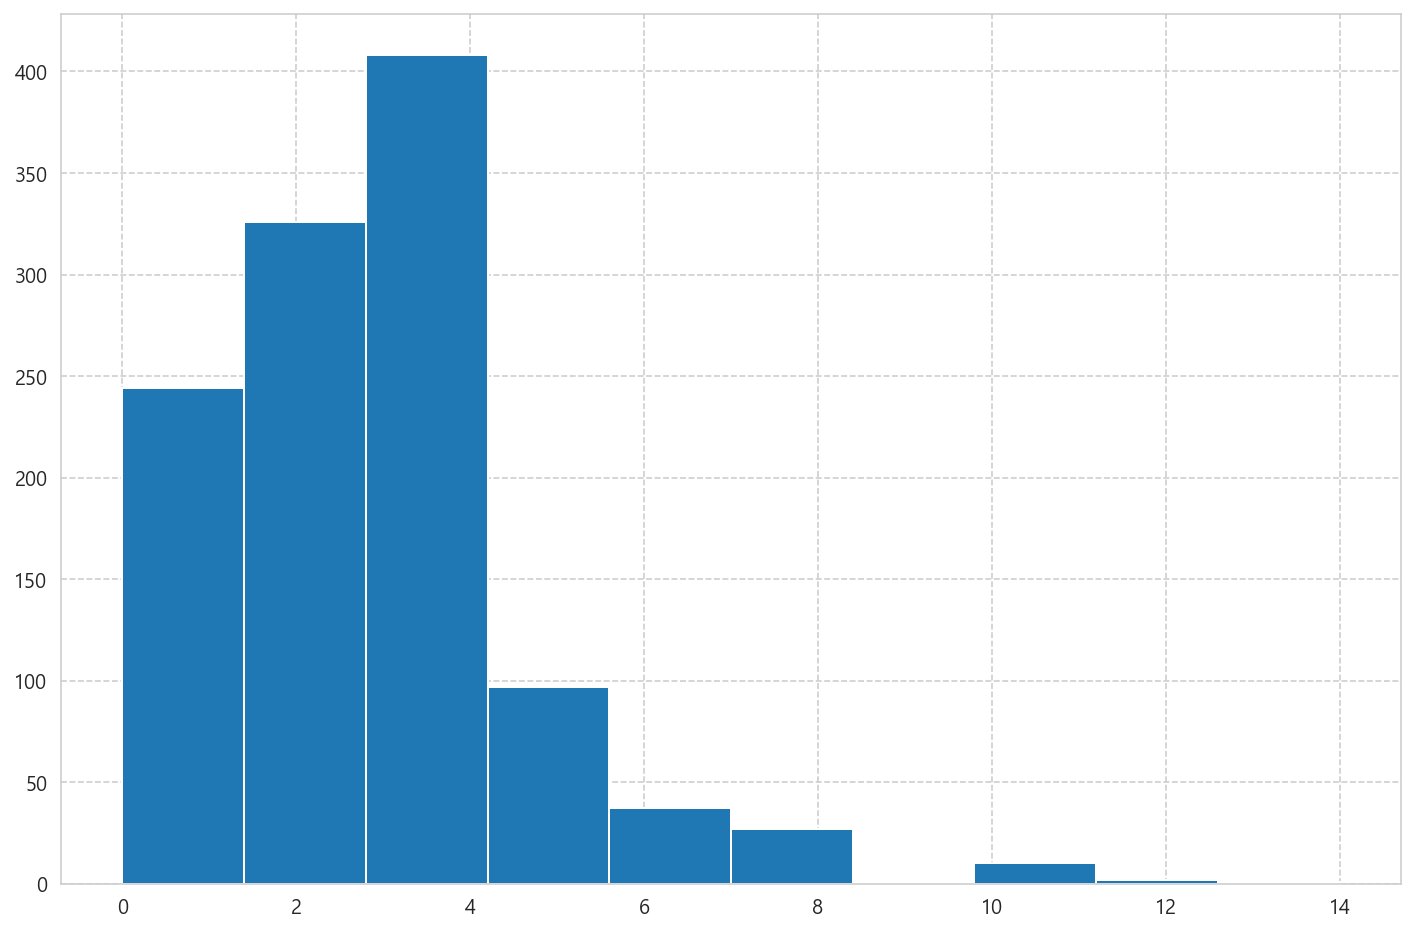

In [101]:
plt.figure(figsize=(12,8))
df1[df1['labels']==3]['나이'].hist()
plt.show()